# Dogs vs Cats

https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import vgg16

print(tf.__version__)
print(tf.executing_eagerly())

2.3.0
True


In [2]:
import os 
#os.chdir ('E://Netology/CV/lectures-master/006')

In [3]:
import zipfile 

In [4]:
!unzip "../input/dogs-vs-cats-redux-kernels-edition/train.zip"

Archive:  ../input/dogs-vs-cats-redux-kernels-edition/train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  in

  inflating: train/cat.10208.jpg     
  inflating: train/cat.10209.jpg     
  inflating: train/cat.1021.jpg      
  inflating: train/cat.10210.jpg     
  inflating: train/cat.10211.jpg     
  inflating: train/cat.10212.jpg     
  inflating: train/cat.10213.jpg     
  inflating: train/cat.10214.jpg     
  inflating: train/cat.10215.jpg     
  inflating: train/cat.10216.jpg     
  inflating: train/cat.10217.jpg     
  inflating: train/cat.10218.jpg     
  inflating: train/cat.10219.jpg     
  inflating: train/cat.1022.jpg      
  inflating: train/cat.10220.jpg     
  inflating: train/cat.10221.jpg     
  inflating: train/cat.10222.jpg     
  inflating: train/cat.10223.jpg     
  inflating: train/cat.10224.jpg     
  inflating: train/cat.10225.jpg     
  inflating: train/cat.10226.jpg     
  inflating: train/cat.10227.jpg     
  inflating: train/cat.10228.jpg     
  inflating: train/cat.10229.jpg     
  inflating: train/cat.1023.jpg      
  inflating: train/cat.10230.jpg     
  inflating:

  inflating: train/cat.10486.jpg     
  inflating: train/cat.10487.jpg     
  inflating: train/cat.10488.jpg     
  inflating: train/cat.10489.jpg     
  inflating: train/cat.1049.jpg      
  inflating: train/cat.10490.jpg     
  inflating: train/cat.10491.jpg     
  inflating: train/cat.10492.jpg     
  inflating: train/cat.10493.jpg     
  inflating: train/cat.10494.jpg     
  inflating: train/cat.10495.jpg     
  inflating: train/cat.10496.jpg     
  inflating: train/cat.10497.jpg     
  inflating: train/cat.10498.jpg     
  inflating: train/cat.10499.jpg     
  inflating: train/cat.105.jpg       
  inflating: train/cat.1050.jpg      
  inflating: train/cat.10500.jpg     
  inflating: train/cat.10501.jpg     
  inflating: train/cat.10502.jpg     
  inflating: train/cat.10503.jpg     
  inflating: train/cat.10504.jpg     
  inflating: train/cat.10505.jpg     
  inflating: train/cat.10506.jpg     
  inflating: train/cat.10507.jpg     
  inflating: train/cat.10508.jpg     
  inflating:

  inflating: train/cat.10777.jpg     
  inflating: train/cat.10778.jpg     
  inflating: train/cat.10779.jpg     
  inflating: train/cat.1078.jpg      
  inflating: train/cat.10780.jpg     
  inflating: train/cat.10781.jpg     
  inflating: train/cat.10782.jpg     
  inflating: train/cat.10783.jpg     
  inflating: train/cat.10784.jpg     
  inflating: train/cat.10785.jpg     
  inflating: train/cat.10786.jpg     
  inflating: train/cat.10787.jpg     
  inflating: train/cat.10788.jpg     
  inflating: train/cat.10789.jpg     
  inflating: train/cat.1079.jpg      
  inflating: train/cat.10790.jpg     
  inflating: train/cat.10791.jpg     
  inflating: train/cat.10792.jpg     
  inflating: train/cat.10793.jpg     
  inflating: train/cat.10794.jpg     
  inflating: train/cat.10795.jpg     
  inflating: train/cat.10796.jpg     
  inflating: train/cat.10797.jpg     
  inflating: train/cat.10798.jpg     
  inflating: train/cat.10799.jpg     
  inflating: train/cat.108.jpg       
  inflating:

  inflating: train/cat.11088.jpg     
  inflating: train/cat.11089.jpg     
  inflating: train/cat.1109.jpg      
  inflating: train/cat.11090.jpg     
  inflating: train/cat.11091.jpg     
  inflating: train/cat.11092.jpg     
  inflating: train/cat.11093.jpg     
  inflating: train/cat.11094.jpg     
  inflating: train/cat.11095.jpg     
  inflating: train/cat.11096.jpg     
  inflating: train/cat.11097.jpg     
  inflating: train/cat.11098.jpg     
  inflating: train/cat.11099.jpg     
  inflating: train/cat.111.jpg       
  inflating: train/cat.1110.jpg      
  inflating: train/cat.11100.jpg     
  inflating: train/cat.11101.jpg     
  inflating: train/cat.11102.jpg     
  inflating: train/cat.11103.jpg     
  inflating: train/cat.11104.jpg     
  inflating: train/cat.11105.jpg     
  inflating: train/cat.11106.jpg     
  inflating: train/cat.11107.jpg     
  inflating: train/cat.11108.jpg     
  inflating: train/cat.11109.jpg     
  inflating: train/cat.1111.jpg      
  inflating:

  inflating: train/cat.11396.jpg     
  inflating: train/cat.11397.jpg     
  inflating: train/cat.11398.jpg     
  inflating: train/cat.11399.jpg     
  inflating: train/cat.114.jpg       
  inflating: train/cat.1140.jpg      
  inflating: train/cat.11400.jpg     
  inflating: train/cat.11401.jpg     
  inflating: train/cat.11402.jpg     
  inflating: train/cat.11403.jpg     
  inflating: train/cat.11404.jpg     
  inflating: train/cat.11405.jpg     
  inflating: train/cat.11406.jpg     
  inflating: train/cat.11407.jpg     
  inflating: train/cat.11408.jpg     
  inflating: train/cat.11409.jpg     
  inflating: train/cat.1141.jpg      
  inflating: train/cat.11410.jpg     
  inflating: train/cat.11411.jpg     
  inflating: train/cat.11412.jpg     
  inflating: train/cat.11413.jpg     
  inflating: train/cat.11414.jpg     
  inflating: train/cat.11415.jpg     
  inflating: train/cat.11416.jpg     
  inflating: train/cat.11417.jpg     
  inflating: train/cat.11418.jpg     
  inflating:

  inflating: train/cat.11716.jpg     
  inflating: train/cat.11717.jpg     
  inflating: train/cat.11718.jpg     
  inflating: train/cat.11719.jpg     
  inflating: train/cat.1172.jpg      
  inflating: train/cat.11720.jpg     
  inflating: train/cat.11721.jpg     
  inflating: train/cat.11722.jpg     
  inflating: train/cat.11723.jpg     
  inflating: train/cat.11724.jpg     
  inflating: train/cat.11725.jpg     
  inflating: train/cat.11726.jpg     
  inflating: train/cat.11727.jpg     
  inflating: train/cat.11728.jpg     
  inflating: train/cat.11729.jpg     
  inflating: train/cat.1173.jpg      
  inflating: train/cat.11730.jpg     
  inflating: train/cat.11731.jpg     
  inflating: train/cat.11732.jpg     
  inflating: train/cat.11733.jpg     
  inflating: train/cat.11734.jpg     
  inflating: train/cat.11735.jpg     
  inflating: train/cat.11736.jpg     
  inflating: train/cat.11737.jpg     
  inflating: train/cat.11738.jpg     
  inflating: train/cat.11739.jpg     
  inflating:

  inflating: train/cat.12029.jpg     
  inflating: train/cat.1203.jpg      
  inflating: train/cat.12030.jpg     
  inflating: train/cat.12031.jpg     
  inflating: train/cat.12032.jpg     
  inflating: train/cat.12033.jpg     
  inflating: train/cat.12034.jpg     
  inflating: train/cat.12035.jpg     
  inflating: train/cat.12036.jpg     
  inflating: train/cat.12037.jpg     
  inflating: train/cat.12038.jpg     
  inflating: train/cat.12039.jpg     
  inflating: train/cat.1204.jpg      
  inflating: train/cat.12040.jpg     
  inflating: train/cat.12041.jpg     
  inflating: train/cat.12042.jpg     
  inflating: train/cat.12043.jpg     
  inflating: train/cat.12044.jpg     
  inflating: train/cat.12045.jpg     
  inflating: train/cat.12046.jpg     
  inflating: train/cat.12047.jpg     
  inflating: train/cat.12048.jpg     
  inflating: train/cat.12049.jpg     
  inflating: train/cat.1205.jpg      
  inflating: train/cat.12050.jpg     
  inflating: train/cat.12051.jpg     
  inflating:

  inflating: train/cat.12363.jpg     
  inflating: train/cat.12364.jpg     
  inflating: train/cat.12365.jpg     
  inflating: train/cat.12366.jpg     
  inflating: train/cat.12367.jpg     
  inflating: train/cat.12368.jpg     
  inflating: train/cat.12369.jpg     
  inflating: train/cat.1237.jpg      
  inflating: train/cat.12370.jpg     
  inflating: train/cat.12371.jpg     
  inflating: train/cat.12372.jpg     
  inflating: train/cat.12373.jpg     
  inflating: train/cat.12374.jpg     
  inflating: train/cat.12375.jpg     
  inflating: train/cat.12376.jpg     
  inflating: train/cat.12377.jpg     
  inflating: train/cat.12378.jpg     
  inflating: train/cat.12379.jpg     
  inflating: train/cat.1238.jpg      
  inflating: train/cat.12380.jpg     
  inflating: train/cat.12381.jpg     
  inflating: train/cat.12382.jpg     
  inflating: train/cat.12383.jpg     
  inflating: train/cat.12384.jpg     
  inflating: train/cat.12385.jpg     
  inflating: train/cat.12386.jpg     
  inflating:

  inflating: train/cat.1418.jpg      
  inflating: train/cat.1419.jpg      
  inflating: train/cat.142.jpg       
  inflating: train/cat.1420.jpg      
  inflating: train/cat.1421.jpg      
  inflating: train/cat.1422.jpg      
  inflating: train/cat.1423.jpg      
  inflating: train/cat.1424.jpg      
  inflating: train/cat.1425.jpg      
  inflating: train/cat.1426.jpg      
  inflating: train/cat.1427.jpg      
  inflating: train/cat.1428.jpg      
  inflating: train/cat.1429.jpg      
  inflating: train/cat.143.jpg       
  inflating: train/cat.1430.jpg      
  inflating: train/cat.1431.jpg      
  inflating: train/cat.1432.jpg      
  inflating: train/cat.1433.jpg      
  inflating: train/cat.1434.jpg      
  inflating: train/cat.1435.jpg      
  inflating: train/cat.1436.jpg      
  inflating: train/cat.1437.jpg      
  inflating: train/cat.1438.jpg      
  inflating: train/cat.1439.jpg      
  inflating: train/cat.144.jpg       
  inflating: train/cat.1440.jpg      
  inflating:

  inflating: train/cat.173.jpg       
  inflating: train/cat.1730.jpg      
  inflating: train/cat.1731.jpg      
  inflating: train/cat.1732.jpg      
  inflating: train/cat.1733.jpg      
  inflating: train/cat.1734.jpg      
  inflating: train/cat.1735.jpg      
  inflating: train/cat.1736.jpg      
  inflating: train/cat.1737.jpg      
  inflating: train/cat.1738.jpg      
  inflating: train/cat.1739.jpg      
  inflating: train/cat.174.jpg       
  inflating: train/cat.1740.jpg      
  inflating: train/cat.1741.jpg      
  inflating: train/cat.1742.jpg      
  inflating: train/cat.1743.jpg      
  inflating: train/cat.1744.jpg      
  inflating: train/cat.1745.jpg      
  inflating: train/cat.1746.jpg      
  inflating: train/cat.1747.jpg      
  inflating: train/cat.1748.jpg      
  inflating: train/cat.1749.jpg      
  inflating: train/cat.175.jpg       
  inflating: train/cat.1750.jpg      
  inflating: train/cat.1751.jpg      
  inflating: train/cat.1752.jpg      
  inflating:

  inflating: train/cat.2049.jpg      
  inflating: train/cat.205.jpg       
  inflating: train/cat.2050.jpg      
  inflating: train/cat.2051.jpg      
  inflating: train/cat.2052.jpg      
  inflating: train/cat.2053.jpg      
  inflating: train/cat.2054.jpg      
  inflating: train/cat.2055.jpg      
  inflating: train/cat.2056.jpg      
  inflating: train/cat.2057.jpg      
  inflating: train/cat.2058.jpg      
  inflating: train/cat.2059.jpg      
  inflating: train/cat.206.jpg       
  inflating: train/cat.2060.jpg      
  inflating: train/cat.2061.jpg      
  inflating: train/cat.2062.jpg      
  inflating: train/cat.2063.jpg      
  inflating: train/cat.2064.jpg      
  inflating: train/cat.2065.jpg      
  inflating: train/cat.2066.jpg      
  inflating: train/cat.2067.jpg      
  inflating: train/cat.2068.jpg      
  inflating: train/cat.2069.jpg      
  inflating: train/cat.207.jpg       
  inflating: train/cat.2070.jpg      
  inflating: train/cat.2071.jpg      
  inflating:

  inflating: train/cat.2353.jpg      
  inflating: train/cat.2354.jpg      
  inflating: train/cat.2355.jpg      
  inflating: train/cat.2356.jpg      
  inflating: train/cat.2357.jpg      
  inflating: train/cat.2358.jpg      
  inflating: train/cat.2359.jpg      
  inflating: train/cat.236.jpg       
  inflating: train/cat.2360.jpg      
  inflating: train/cat.2361.jpg      
  inflating: train/cat.2362.jpg      
  inflating: train/cat.2363.jpg      
  inflating: train/cat.2364.jpg      
  inflating: train/cat.2365.jpg      
  inflating: train/cat.2366.jpg      
  inflating: train/cat.2367.jpg      
  inflating: train/cat.2368.jpg      
  inflating: train/cat.2369.jpg      
  inflating: train/cat.237.jpg       
  inflating: train/cat.2370.jpg      
  inflating: train/cat.2371.jpg      
  inflating: train/cat.2372.jpg      
  inflating: train/cat.2373.jpg      
  inflating: train/cat.2374.jpg      
  inflating: train/cat.2375.jpg      
  inflating: train/cat.2376.jpg      
  inflating:

  inflating: train/cat.2677.jpg      
  inflating: train/cat.2678.jpg      
  inflating: train/cat.2679.jpg      
  inflating: train/cat.268.jpg       
  inflating: train/cat.2680.jpg      
  inflating: train/cat.2681.jpg      
  inflating: train/cat.2682.jpg      
  inflating: train/cat.2683.jpg      
  inflating: train/cat.2684.jpg      
  inflating: train/cat.2685.jpg      
  inflating: train/cat.2686.jpg      
  inflating: train/cat.2687.jpg      
  inflating: train/cat.2688.jpg      
  inflating: train/cat.2689.jpg      
  inflating: train/cat.269.jpg       
  inflating: train/cat.2690.jpg      
  inflating: train/cat.2691.jpg      
  inflating: train/cat.2692.jpg      
  inflating: train/cat.2693.jpg      
  inflating: train/cat.2694.jpg      
  inflating: train/cat.2695.jpg      
  inflating: train/cat.2696.jpg      
  inflating: train/cat.2697.jpg      
  inflating: train/cat.2698.jpg      
  inflating: train/cat.2699.jpg      
  inflating: train/cat.27.jpg        
  inflating:

  inflating: train/cat.3000.jpg      
  inflating: train/cat.3001.jpg      
  inflating: train/cat.3002.jpg      
  inflating: train/cat.3003.jpg      
  inflating: train/cat.3004.jpg      
  inflating: train/cat.3005.jpg      
  inflating: train/cat.3006.jpg      
  inflating: train/cat.3007.jpg      
  inflating: train/cat.3008.jpg      
  inflating: train/cat.3009.jpg      
  inflating: train/cat.301.jpg       
  inflating: train/cat.3010.jpg      
  inflating: train/cat.3011.jpg      
  inflating: train/cat.3012.jpg      
  inflating: train/cat.3013.jpg      
  inflating: train/cat.3014.jpg      
  inflating: train/cat.3015.jpg      
  inflating: train/cat.3016.jpg      
  inflating: train/cat.3017.jpg      
  inflating: train/cat.3018.jpg      
  inflating: train/cat.3019.jpg      
  inflating: train/cat.302.jpg       
  inflating: train/cat.3020.jpg      
  inflating: train/cat.3021.jpg      
  inflating: train/cat.3022.jpg      
  inflating: train/cat.3023.jpg      
  inflating:

  inflating: train/cat.3313.jpg      
  inflating: train/cat.3314.jpg      
  inflating: train/cat.3315.jpg      
  inflating: train/cat.3316.jpg      
  inflating: train/cat.3317.jpg      
  inflating: train/cat.3318.jpg      
  inflating: train/cat.3319.jpg      
  inflating: train/cat.332.jpg       
  inflating: train/cat.3320.jpg      
  inflating: train/cat.3321.jpg      
  inflating: train/cat.3322.jpg      
  inflating: train/cat.3323.jpg      
  inflating: train/cat.3324.jpg      
  inflating: train/cat.3325.jpg      
  inflating: train/cat.3326.jpg      
  inflating: train/cat.3327.jpg      
  inflating: train/cat.3328.jpg      
  inflating: train/cat.3329.jpg      
  inflating: train/cat.333.jpg       
  inflating: train/cat.3330.jpg      
  inflating: train/cat.3331.jpg      
  inflating: train/cat.3332.jpg      
  inflating: train/cat.3333.jpg      
  inflating: train/cat.3334.jpg      
  inflating: train/cat.3335.jpg      
  inflating: train/cat.3336.jpg      
  inflating:

  inflating: train/cat.3616.jpg      
  inflating: train/cat.3617.jpg      
  inflating: train/cat.3618.jpg      
  inflating: train/cat.3619.jpg      
  inflating: train/cat.362.jpg       
  inflating: train/cat.3620.jpg      
  inflating: train/cat.3621.jpg      
  inflating: train/cat.3622.jpg      
  inflating: train/cat.3623.jpg      
  inflating: train/cat.3624.jpg      
  inflating: train/cat.3625.jpg      
  inflating: train/cat.3626.jpg      
  inflating: train/cat.3627.jpg      
  inflating: train/cat.3628.jpg      
  inflating: train/cat.3629.jpg      
  inflating: train/cat.363.jpg       
  inflating: train/cat.3630.jpg      
  inflating: train/cat.3631.jpg      
  inflating: train/cat.3632.jpg      
  inflating: train/cat.3633.jpg      
  inflating: train/cat.3634.jpg      
  inflating: train/cat.3635.jpg      
  inflating: train/cat.3636.jpg      
  inflating: train/cat.3637.jpg      
  inflating: train/cat.3638.jpg      
  inflating: train/cat.3639.jpg      
  inflating:

  inflating: train/cat.3936.jpg      
  inflating: train/cat.3937.jpg      
  inflating: train/cat.3938.jpg      
  inflating: train/cat.3939.jpg      
  inflating: train/cat.394.jpg       
  inflating: train/cat.3940.jpg      
  inflating: train/cat.3941.jpg      
  inflating: train/cat.3942.jpg      
  inflating: train/cat.3943.jpg      
  inflating: train/cat.3944.jpg      
  inflating: train/cat.3945.jpg      
  inflating: train/cat.3946.jpg      
  inflating: train/cat.3947.jpg      
  inflating: train/cat.3948.jpg      
  inflating: train/cat.3949.jpg      
  inflating: train/cat.395.jpg       
  inflating: train/cat.3950.jpg      
  inflating: train/cat.3951.jpg      
  inflating: train/cat.3952.jpg      
  inflating: train/cat.3953.jpg      
  inflating: train/cat.3954.jpg      
  inflating: train/cat.3955.jpg      
  inflating: train/cat.3956.jpg      
  inflating: train/cat.3957.jpg      
  inflating: train/cat.3958.jpg      
  inflating: train/cat.3959.jpg      
  inflating:

  inflating: train/cat.423.jpg       
  inflating: train/cat.4230.jpg      
  inflating: train/cat.4231.jpg      
  inflating: train/cat.4232.jpg      
  inflating: train/cat.4233.jpg      
  inflating: train/cat.4234.jpg      
  inflating: train/cat.4235.jpg      
  inflating: train/cat.4236.jpg      
  inflating: train/cat.4237.jpg      
  inflating: train/cat.4238.jpg      
  inflating: train/cat.4239.jpg      
  inflating: train/cat.424.jpg       
  inflating: train/cat.4240.jpg      
  inflating: train/cat.4241.jpg      
  inflating: train/cat.4242.jpg      
  inflating: train/cat.4243.jpg      
  inflating: train/cat.4244.jpg      
  inflating: train/cat.4245.jpg      
  inflating: train/cat.4246.jpg      
  inflating: train/cat.4247.jpg      
  inflating: train/cat.4248.jpg      
  inflating: train/cat.4249.jpg      
  inflating: train/cat.425.jpg       
  inflating: train/cat.4250.jpg      
  inflating: train/cat.4251.jpg      
  inflating: train/cat.4252.jpg      
  inflating:

  inflating: train/cat.4534.jpg      
  inflating: train/cat.4535.jpg      
  inflating: train/cat.4536.jpg      
  inflating: train/cat.4537.jpg      
  inflating: train/cat.4538.jpg      
  inflating: train/cat.4539.jpg      
  inflating: train/cat.454.jpg       
  inflating: train/cat.4540.jpg      
  inflating: train/cat.4541.jpg      
  inflating: train/cat.4542.jpg      
  inflating: train/cat.4543.jpg      
  inflating: train/cat.4544.jpg      
  inflating: train/cat.4545.jpg      
  inflating: train/cat.4546.jpg      
  inflating: train/cat.4547.jpg      
  inflating: train/cat.4548.jpg      
  inflating: train/cat.4549.jpg      
  inflating: train/cat.455.jpg       
  inflating: train/cat.4550.jpg      
  inflating: train/cat.4551.jpg      
  inflating: train/cat.4552.jpg      
  inflating: train/cat.4553.jpg      
  inflating: train/cat.4554.jpg      
  inflating: train/cat.4555.jpg      
  inflating: train/cat.4556.jpg      
  inflating: train/cat.4557.jpg      
  inflating:

  inflating: train/cat.4843.jpg      
  inflating: train/cat.4844.jpg      
  inflating: train/cat.4845.jpg      
  inflating: train/cat.4846.jpg      
  inflating: train/cat.4847.jpg      
  inflating: train/cat.4848.jpg      
  inflating: train/cat.4849.jpg      
  inflating: train/cat.485.jpg       
  inflating: train/cat.4850.jpg      
  inflating: train/cat.4851.jpg      
  inflating: train/cat.4852.jpg      
  inflating: train/cat.4853.jpg      
  inflating: train/cat.4854.jpg      
  inflating: train/cat.4855.jpg      
  inflating: train/cat.4856.jpg      
  inflating: train/cat.4857.jpg      
  inflating: train/cat.4858.jpg      
  inflating: train/cat.4859.jpg      
  inflating: train/cat.486.jpg       
  inflating: train/cat.4860.jpg      
  inflating: train/cat.4861.jpg      
  inflating: train/cat.4862.jpg      
  inflating: train/cat.4863.jpg      
  inflating: train/cat.4864.jpg      
  inflating: train/cat.4865.jpg      
  inflating: train/cat.4866.jpg      
  inflating:

  inflating: train/cat.5145.jpg      
  inflating: train/cat.5146.jpg      
  inflating: train/cat.5147.jpg      
  inflating: train/cat.5148.jpg      
  inflating: train/cat.5149.jpg      
  inflating: train/cat.515.jpg       
  inflating: train/cat.5150.jpg      
  inflating: train/cat.5151.jpg      
  inflating: train/cat.5152.jpg      
  inflating: train/cat.5153.jpg      
  inflating: train/cat.5154.jpg      
  inflating: train/cat.5155.jpg      
  inflating: train/cat.5156.jpg      
  inflating: train/cat.5157.jpg      
  inflating: train/cat.5158.jpg      
  inflating: train/cat.5159.jpg      
  inflating: train/cat.516.jpg       
  inflating: train/cat.5160.jpg      
  inflating: train/cat.5161.jpg      
  inflating: train/cat.5162.jpg      
  inflating: train/cat.5163.jpg      
  inflating: train/cat.5164.jpg      
  inflating: train/cat.5165.jpg      
  inflating: train/cat.5166.jpg      
  inflating: train/cat.5167.jpg      
  inflating: train/cat.5168.jpg      
  inflating:

  inflating: train/cat.5450.jpg      
  inflating: train/cat.5451.jpg      
  inflating: train/cat.5452.jpg      
  inflating: train/cat.5453.jpg      
  inflating: train/cat.5454.jpg      
  inflating: train/cat.5455.jpg      
  inflating: train/cat.5456.jpg      
  inflating: train/cat.5457.jpg      
  inflating: train/cat.5458.jpg      
  inflating: train/cat.5459.jpg      
  inflating: train/cat.546.jpg       
  inflating: train/cat.5460.jpg      
  inflating: train/cat.5461.jpg      
  inflating: train/cat.5462.jpg      
  inflating: train/cat.5463.jpg      
  inflating: train/cat.5464.jpg      
  inflating: train/cat.5465.jpg      
  inflating: train/cat.5466.jpg      
  inflating: train/cat.5467.jpg      
  inflating: train/cat.5468.jpg      
  inflating: train/cat.5469.jpg      
  inflating: train/cat.547.jpg       
  inflating: train/cat.5470.jpg      
  inflating: train/cat.5471.jpg      
  inflating: train/cat.5472.jpg      
  inflating: train/cat.5473.jpg      
  inflating:

  inflating: train/cat.5748.jpg      
  inflating: train/cat.5749.jpg      
  inflating: train/cat.575.jpg       
  inflating: train/cat.5750.jpg      
  inflating: train/cat.5751.jpg      
  inflating: train/cat.5752.jpg      
  inflating: train/cat.5753.jpg      
  inflating: train/cat.5754.jpg      
  inflating: train/cat.5755.jpg      
  inflating: train/cat.5756.jpg      
  inflating: train/cat.5757.jpg      
  inflating: train/cat.5758.jpg      
  inflating: train/cat.5759.jpg      
  inflating: train/cat.576.jpg       
  inflating: train/cat.5760.jpg      
  inflating: train/cat.5761.jpg      
  inflating: train/cat.5762.jpg      
  inflating: train/cat.5763.jpg      
  inflating: train/cat.5764.jpg      
  inflating: train/cat.5765.jpg      
  inflating: train/cat.5766.jpg      
  inflating: train/cat.5767.jpg      
  inflating: train/cat.5768.jpg      
  inflating: train/cat.5769.jpg      
  inflating: train/cat.577.jpg       
  inflating: train/cat.5770.jpg      
  inflating:

  inflating: train/cat.6060.jpg      
  inflating: train/cat.6061.jpg      
  inflating: train/cat.6062.jpg      
  inflating: train/cat.6063.jpg      
  inflating: train/cat.6064.jpg      
  inflating: train/cat.6065.jpg      
  inflating: train/cat.6066.jpg      
  inflating: train/cat.6067.jpg      
  inflating: train/cat.6068.jpg      
  inflating: train/cat.6069.jpg      
  inflating: train/cat.607.jpg       
  inflating: train/cat.6070.jpg      
  inflating: train/cat.6071.jpg      
  inflating: train/cat.6072.jpg      
  inflating: train/cat.6073.jpg      
  inflating: train/cat.6074.jpg      
  inflating: train/cat.6075.jpg      
  inflating: train/cat.6076.jpg      
  inflating: train/cat.6077.jpg      
  inflating: train/cat.6078.jpg      
  inflating: train/cat.6079.jpg      
  inflating: train/cat.608.jpg       
  inflating: train/cat.6080.jpg      
  inflating: train/cat.6081.jpg      
  inflating: train/cat.6082.jpg      
  inflating: train/cat.6083.jpg      
  inflating:

  inflating: train/cat.6377.jpg      
  inflating: train/cat.6378.jpg      
  inflating: train/cat.6379.jpg      
  inflating: train/cat.638.jpg       
  inflating: train/cat.6380.jpg      
  inflating: train/cat.6381.jpg      
  inflating: train/cat.6382.jpg      
  inflating: train/cat.6383.jpg      
  inflating: train/cat.6384.jpg      
  inflating: train/cat.6385.jpg      
  inflating: train/cat.6386.jpg      
  inflating: train/cat.6387.jpg      
  inflating: train/cat.6388.jpg      
  inflating: train/cat.6389.jpg      
  inflating: train/cat.639.jpg       
  inflating: train/cat.6390.jpg      
  inflating: train/cat.6391.jpg      
  inflating: train/cat.6392.jpg      
  inflating: train/cat.6393.jpg      
  inflating: train/cat.6394.jpg      
  inflating: train/cat.6395.jpg      
  inflating: train/cat.6396.jpg      
  inflating: train/cat.6397.jpg      
  inflating: train/cat.6398.jpg      
  inflating: train/cat.6399.jpg      
  inflating: train/cat.64.jpg        
  inflating:

  inflating: train/cat.6686.jpg      
  inflating: train/cat.6687.jpg      
  inflating: train/cat.6688.jpg      
  inflating: train/cat.6689.jpg      
  inflating: train/cat.669.jpg       
  inflating: train/cat.6690.jpg      
  inflating: train/cat.6691.jpg      
  inflating: train/cat.6692.jpg      
  inflating: train/cat.6693.jpg      
  inflating: train/cat.6694.jpg      
  inflating: train/cat.6695.jpg      
  inflating: train/cat.6696.jpg      
  inflating: train/cat.6697.jpg      
  inflating: train/cat.6698.jpg      
  inflating: train/cat.6699.jpg      
  inflating: train/cat.67.jpg        
  inflating: train/cat.670.jpg       
  inflating: train/cat.6700.jpg      
  inflating: train/cat.6701.jpg      
  inflating: train/cat.6702.jpg      
  inflating: train/cat.6703.jpg      
  inflating: train/cat.6704.jpg      
  inflating: train/cat.6705.jpg      
  inflating: train/cat.6706.jpg      
  inflating: train/cat.6707.jpg      
  inflating: train/cat.6708.jpg      
  inflating:

  inflating: train/cat.699.jpg       
  inflating: train/cat.6990.jpg      
  inflating: train/cat.6991.jpg      
  inflating: train/cat.6992.jpg      
  inflating: train/cat.6993.jpg      
  inflating: train/cat.6994.jpg      
  inflating: train/cat.6995.jpg      
  inflating: train/cat.6996.jpg      
  inflating: train/cat.6997.jpg      
  inflating: train/cat.6998.jpg      
  inflating: train/cat.6999.jpg      
  inflating: train/cat.7.jpg         
  inflating: train/cat.70.jpg        
  inflating: train/cat.700.jpg       
  inflating: train/cat.7000.jpg      
  inflating: train/cat.7001.jpg      
  inflating: train/cat.7002.jpg      
  inflating: train/cat.7003.jpg      
  inflating: train/cat.7004.jpg      
  inflating: train/cat.7005.jpg      
  inflating: train/cat.7006.jpg      
  inflating: train/cat.7007.jpg      
  inflating: train/cat.7008.jpg      
  inflating: train/cat.7009.jpg      
  inflating: train/cat.701.jpg       
  inflating: train/cat.7010.jpg      
  inflating:

  inflating: train/cat.7298.jpg      
  inflating: train/cat.7299.jpg      
  inflating: train/cat.73.jpg        
  inflating: train/cat.730.jpg       
  inflating: train/cat.7300.jpg      
  inflating: train/cat.7301.jpg      
  inflating: train/cat.7302.jpg      
  inflating: train/cat.7303.jpg      
  inflating: train/cat.7304.jpg      
  inflating: train/cat.7305.jpg      
  inflating: train/cat.7306.jpg      
  inflating: train/cat.7307.jpg      
  inflating: train/cat.7308.jpg      
  inflating: train/cat.7309.jpg      
  inflating: train/cat.731.jpg       
  inflating: train/cat.7310.jpg      
  inflating: train/cat.7311.jpg      
  inflating: train/cat.7312.jpg      
  inflating: train/cat.7313.jpg      
  inflating: train/cat.7314.jpg      
  inflating: train/cat.7315.jpg      
  inflating: train/cat.7316.jpg      
  inflating: train/cat.7317.jpg      
  inflating: train/cat.7318.jpg      
  inflating: train/cat.7319.jpg      
  inflating: train/cat.732.jpg       
  inflating:

  inflating: train/cat.7594.jpg      
  inflating: train/cat.7595.jpg      
  inflating: train/cat.7596.jpg      
  inflating: train/cat.7597.jpg      
  inflating: train/cat.7598.jpg      
  inflating: train/cat.7599.jpg      
  inflating: train/cat.76.jpg        
  inflating: train/cat.760.jpg       
  inflating: train/cat.7600.jpg      
  inflating: train/cat.7601.jpg      
  inflating: train/cat.7602.jpg      
  inflating: train/cat.7603.jpg      
  inflating: train/cat.7604.jpg      
  inflating: train/cat.7605.jpg      
  inflating: train/cat.7606.jpg      
  inflating: train/cat.7607.jpg      
  inflating: train/cat.7608.jpg      
  inflating: train/cat.7609.jpg      
  inflating: train/cat.761.jpg       
  inflating: train/cat.7610.jpg      
  inflating: train/cat.7611.jpg      
  inflating: train/cat.7612.jpg      
  inflating: train/cat.7613.jpg      
  inflating: train/cat.7614.jpg      
  inflating: train/cat.7615.jpg      
  inflating: train/cat.7616.jpg      
  inflating:

  inflating: train/cat.7907.jpg      
  inflating: train/cat.7908.jpg      
  inflating: train/cat.7909.jpg      
  inflating: train/cat.791.jpg       
  inflating: train/cat.7910.jpg      
  inflating: train/cat.7911.jpg      
  inflating: train/cat.7912.jpg      
  inflating: train/cat.7913.jpg      
  inflating: train/cat.7914.jpg      
  inflating: train/cat.7915.jpg      
  inflating: train/cat.7916.jpg      
  inflating: train/cat.7917.jpg      
  inflating: train/cat.7918.jpg      
  inflating: train/cat.7919.jpg      
  inflating: train/cat.792.jpg       
  inflating: train/cat.7920.jpg      
  inflating: train/cat.7921.jpg      
  inflating: train/cat.7922.jpg      
  inflating: train/cat.7923.jpg      
  inflating: train/cat.7924.jpg      
  inflating: train/cat.7925.jpg      
  inflating: train/cat.7926.jpg      
  inflating: train/cat.7927.jpg      
  inflating: train/cat.7928.jpg      
  inflating: train/cat.7929.jpg      
  inflating: train/cat.793.jpg       
  inflating:

  inflating: train/cat.8224.jpg      
  inflating: train/cat.8225.jpg      
  inflating: train/cat.8226.jpg      
  inflating: train/cat.8227.jpg      
  inflating: train/cat.8228.jpg      
  inflating: train/cat.8229.jpg      
  inflating: train/cat.823.jpg       
  inflating: train/cat.8230.jpg      
  inflating: train/cat.8231.jpg      
  inflating: train/cat.8232.jpg      
  inflating: train/cat.8233.jpg      
  inflating: train/cat.8234.jpg      
  inflating: train/cat.8235.jpg      
  inflating: train/cat.8236.jpg      
  inflating: train/cat.8237.jpg      
  inflating: train/cat.8238.jpg      
  inflating: train/cat.8239.jpg      
  inflating: train/cat.824.jpg       
  inflating: train/cat.8240.jpg      
  inflating: train/cat.8241.jpg      
  inflating: train/cat.8242.jpg      
  inflating: train/cat.8243.jpg      
  inflating: train/cat.8244.jpg      
  inflating: train/cat.8245.jpg      
  inflating: train/cat.8246.jpg      
  inflating: train/cat.8247.jpg      
  inflating:

  inflating: train/cat.8524.jpg      
  inflating: train/cat.8525.jpg      
  inflating: train/cat.8526.jpg      
  inflating: train/cat.8527.jpg      
  inflating: train/cat.8528.jpg      
  inflating: train/cat.8529.jpg      
  inflating: train/cat.853.jpg       
  inflating: train/cat.8530.jpg      
  inflating: train/cat.8531.jpg      
  inflating: train/cat.8532.jpg      
  inflating: train/cat.8533.jpg      
  inflating: train/cat.8534.jpg      
  inflating: train/cat.8535.jpg      
  inflating: train/cat.8536.jpg      
  inflating: train/cat.8537.jpg      
  inflating: train/cat.8538.jpg      
  inflating: train/cat.8539.jpg      
  inflating: train/cat.854.jpg       
  inflating: train/cat.8540.jpg      
  inflating: train/cat.8541.jpg      
  inflating: train/cat.8542.jpg      
  inflating: train/cat.8543.jpg      
  inflating: train/cat.8544.jpg      
  inflating: train/cat.8545.jpg      
  inflating: train/cat.8546.jpg      
  inflating: train/cat.8547.jpg      
  inflating:

  inflating: train/cat.8844.jpg      
  inflating: train/cat.8845.jpg      
  inflating: train/cat.8846.jpg      
  inflating: train/cat.8847.jpg      
  inflating: train/cat.8848.jpg      
  inflating: train/cat.8849.jpg      
  inflating: train/cat.885.jpg       
  inflating: train/cat.8850.jpg      
  inflating: train/cat.8851.jpg      
  inflating: train/cat.8852.jpg      
  inflating: train/cat.8853.jpg      
  inflating: train/cat.8854.jpg      
  inflating: train/cat.8855.jpg      
  inflating: train/cat.8856.jpg      
  inflating: train/cat.8857.jpg      
  inflating: train/cat.8858.jpg      
  inflating: train/cat.8859.jpg      
  inflating: train/cat.886.jpg       
  inflating: train/cat.8860.jpg      
  inflating: train/cat.8861.jpg      
  inflating: train/cat.8862.jpg      
  inflating: train/cat.8863.jpg      
  inflating: train/cat.8864.jpg      
  inflating: train/cat.8865.jpg      
  inflating: train/cat.8866.jpg      
  inflating: train/cat.8867.jpg      
  inflating:

  inflating: train/cat.9147.jpg      
  inflating: train/cat.9148.jpg      
  inflating: train/cat.9149.jpg      
  inflating: train/cat.915.jpg       
  inflating: train/cat.9150.jpg      
  inflating: train/cat.9151.jpg      
  inflating: train/cat.9152.jpg      
  inflating: train/cat.9153.jpg      
  inflating: train/cat.9154.jpg      
  inflating: train/cat.9155.jpg      
  inflating: train/cat.9156.jpg      
  inflating: train/cat.9157.jpg      
  inflating: train/cat.9158.jpg      
  inflating: train/cat.9159.jpg      
  inflating: train/cat.916.jpg       
  inflating: train/cat.9160.jpg      
  inflating: train/cat.9161.jpg      
  inflating: train/cat.9162.jpg      
  inflating: train/cat.9163.jpg      
  inflating: train/cat.9164.jpg      
  inflating: train/cat.9165.jpg      
  inflating: train/cat.9166.jpg      
  inflating: train/cat.9167.jpg      
  inflating: train/cat.9168.jpg      
  inflating: train/cat.9169.jpg      
  inflating: train/cat.917.jpg       
  inflating:

  inflating: train/cat.9465.jpg      
  inflating: train/cat.9466.jpg      
  inflating: train/cat.9467.jpg      
  inflating: train/cat.9468.jpg      
  inflating: train/cat.9469.jpg      
  inflating: train/cat.947.jpg       
  inflating: train/cat.9470.jpg      
  inflating: train/cat.9471.jpg      
  inflating: train/cat.9472.jpg      
  inflating: train/cat.9473.jpg      
  inflating: train/cat.9474.jpg      
  inflating: train/cat.9475.jpg      
  inflating: train/cat.9476.jpg      
  inflating: train/cat.9477.jpg      
  inflating: train/cat.9478.jpg      
  inflating: train/cat.9479.jpg      
  inflating: train/cat.948.jpg       
  inflating: train/cat.9480.jpg      
  inflating: train/cat.9481.jpg      
  inflating: train/cat.9482.jpg      
  inflating: train/cat.9483.jpg      
  inflating: train/cat.9484.jpg      
  inflating: train/cat.9485.jpg      
  inflating: train/cat.9486.jpg      
  inflating: train/cat.9487.jpg      
  inflating: train/cat.9488.jpg      
  inflating:

  inflating: train/cat.9798.jpg      
  inflating: train/cat.9799.jpg      
  inflating: train/cat.98.jpg        
  inflating: train/cat.980.jpg       
  inflating: train/cat.9800.jpg      
  inflating: train/cat.9801.jpg      
  inflating: train/cat.9802.jpg      
  inflating: train/cat.9803.jpg      
  inflating: train/cat.9804.jpg      
  inflating: train/cat.9805.jpg      
  inflating: train/cat.9806.jpg      
  inflating: train/cat.9807.jpg      
  inflating: train/cat.9808.jpg      
  inflating: train/cat.9809.jpg      
  inflating: train/cat.981.jpg       
  inflating: train/cat.9810.jpg      
  inflating: train/cat.9811.jpg      
  inflating: train/cat.9812.jpg      
  inflating: train/cat.9813.jpg      
  inflating: train/cat.9814.jpg      
  inflating: train/cat.9815.jpg      
  inflating: train/cat.9816.jpg      
  inflating: train/cat.9817.jpg      
  inflating: train/cat.9818.jpg      
  inflating: train/cat.9819.jpg      
  inflating: train/cat.982.jpg       
  inflating:

  inflating: train/dog.10090.jpg     
  inflating: train/dog.10091.jpg     
  inflating: train/dog.10092.jpg     
  inflating: train/dog.10093.jpg     
  inflating: train/dog.10094.jpg     
  inflating: train/dog.10095.jpg     
  inflating: train/dog.10096.jpg     
  inflating: train/dog.10097.jpg     
  inflating: train/dog.10098.jpg     
  inflating: train/dog.10099.jpg     
  inflating: train/dog.101.jpg       
  inflating: train/dog.1010.jpg      
  inflating: train/dog.10100.jpg     
  inflating: train/dog.10101.jpg     
  inflating: train/dog.10102.jpg     
  inflating: train/dog.10103.jpg     
  inflating: train/dog.10104.jpg     
  inflating: train/dog.10105.jpg     
  inflating: train/dog.10106.jpg     
  inflating: train/dog.10107.jpg     
  inflating: train/dog.10108.jpg     
  inflating: train/dog.10109.jpg     
  inflating: train/dog.1011.jpg      
  inflating: train/dog.10110.jpg     
  inflating: train/dog.10111.jpg     
  inflating: train/dog.10112.jpg     
  inflating:

  inflating: train/dog.10356.jpg     
  inflating: train/dog.10357.jpg     
  inflating: train/dog.10358.jpg     
  inflating: train/dog.10359.jpg     
  inflating: train/dog.1036.jpg      
  inflating: train/dog.10360.jpg     
  inflating: train/dog.10361.jpg     
  inflating: train/dog.10362.jpg     
  inflating: train/dog.10363.jpg     
  inflating: train/dog.10364.jpg     
  inflating: train/dog.10365.jpg     
  inflating: train/dog.10366.jpg     
  inflating: train/dog.10367.jpg     
  inflating: train/dog.10368.jpg     
  inflating: train/dog.10369.jpg     
  inflating: train/dog.1037.jpg      
  inflating: train/dog.10370.jpg     
  inflating: train/dog.10371.jpg     
  inflating: train/dog.10372.jpg     
  inflating: train/dog.10373.jpg     
  inflating: train/dog.10374.jpg     
  inflating: train/dog.10375.jpg     
  inflating: train/dog.10376.jpg     
  inflating: train/dog.10377.jpg     
  inflating: train/dog.10378.jpg     
  inflating: train/dog.10379.jpg     
  inflating:

  inflating: train/dog.10635.jpg     
  inflating: train/dog.10636.jpg     
  inflating: train/dog.10637.jpg     
  inflating: train/dog.10638.jpg     
  inflating: train/dog.10639.jpg     
  inflating: train/dog.1064.jpg      
  inflating: train/dog.10640.jpg     
  inflating: train/dog.10641.jpg     
  inflating: train/dog.10642.jpg     
  inflating: train/dog.10643.jpg     
  inflating: train/dog.10644.jpg     
  inflating: train/dog.10645.jpg     
  inflating: train/dog.10646.jpg     
  inflating: train/dog.10647.jpg     
  inflating: train/dog.10648.jpg     
  inflating: train/dog.10649.jpg     
  inflating: train/dog.1065.jpg      
  inflating: train/dog.10650.jpg     
  inflating: train/dog.10651.jpg     
  inflating: train/dog.10652.jpg     
  inflating: train/dog.10653.jpg     
  inflating: train/dog.10654.jpg     
  inflating: train/dog.10655.jpg     
  inflating: train/dog.10656.jpg     
  inflating: train/dog.10657.jpg     
  inflating: train/dog.10658.jpg     
  inflating:

  inflating: train/dog.10910.jpg     
  inflating: train/dog.10911.jpg     
  inflating: train/dog.10912.jpg     
  inflating: train/dog.10913.jpg     
  inflating: train/dog.10914.jpg     
  inflating: train/dog.10915.jpg     
  inflating: train/dog.10916.jpg     
  inflating: train/dog.10917.jpg     
  inflating: train/dog.10918.jpg     
  inflating: train/dog.10919.jpg     
  inflating: train/dog.1092.jpg      
  inflating: train/dog.10920.jpg     
  inflating: train/dog.10921.jpg     
  inflating: train/dog.10922.jpg     
  inflating: train/dog.10923.jpg     
  inflating: train/dog.10924.jpg     
  inflating: train/dog.10925.jpg     
  inflating: train/dog.10926.jpg     
  inflating: train/dog.10927.jpg     
  inflating: train/dog.10928.jpg     
  inflating: train/dog.10929.jpg     
  inflating: train/dog.1093.jpg      
  inflating: train/dog.10930.jpg     
  inflating: train/dog.10931.jpg     
  inflating: train/dog.10932.jpg     
  inflating: train/dog.10933.jpg     
  inflating:

  inflating: train/dog.11192.jpg     
  inflating: train/dog.11193.jpg     
  inflating: train/dog.11194.jpg     
  inflating: train/dog.11195.jpg     
  inflating: train/dog.11196.jpg     
  inflating: train/dog.11197.jpg     
  inflating: train/dog.11198.jpg     
  inflating: train/dog.11199.jpg     
  inflating: train/dog.112.jpg       
  inflating: train/dog.1120.jpg      
  inflating: train/dog.11200.jpg     
  inflating: train/dog.11201.jpg     
  inflating: train/dog.11202.jpg     
  inflating: train/dog.11203.jpg     
  inflating: train/dog.11204.jpg     
  inflating: train/dog.11205.jpg     
  inflating: train/dog.11206.jpg     
  inflating: train/dog.11207.jpg     
  inflating: train/dog.11208.jpg     
  inflating: train/dog.11209.jpg     
  inflating: train/dog.1121.jpg      
  inflating: train/dog.11210.jpg     
  inflating: train/dog.11211.jpg     
  inflating: train/dog.11212.jpg     
  inflating: train/dog.11213.jpg     
  inflating: train/dog.11214.jpg     
  inflating:

  inflating: train/dog.11470.jpg     
  inflating: train/dog.11471.jpg     
  inflating: train/dog.11472.jpg     
  inflating: train/dog.11473.jpg     
  inflating: train/dog.11474.jpg     
  inflating: train/dog.11475.jpg     
  inflating: train/dog.11476.jpg     
  inflating: train/dog.11477.jpg     
  inflating: train/dog.11478.jpg     
  inflating: train/dog.11479.jpg     
  inflating: train/dog.1148.jpg      
  inflating: train/dog.11480.jpg     
  inflating: train/dog.11481.jpg     
  inflating: train/dog.11482.jpg     
  inflating: train/dog.11483.jpg     
  inflating: train/dog.11484.jpg     
  inflating: train/dog.11485.jpg     
  inflating: train/dog.11486.jpg     
  inflating: train/dog.11487.jpg     
  inflating: train/dog.11488.jpg     
  inflating: train/dog.11489.jpg     
  inflating: train/dog.1149.jpg      
  inflating: train/dog.11490.jpg     
  inflating: train/dog.11491.jpg     
  inflating: train/dog.11492.jpg     
  inflating: train/dog.11493.jpg     
  inflating:

  inflating: train/dog.1175.jpg      
  inflating: train/dog.11750.jpg     
  inflating: train/dog.11751.jpg     
  inflating: train/dog.11752.jpg     
  inflating: train/dog.11753.jpg     
  inflating: train/dog.11754.jpg     
  inflating: train/dog.11755.jpg     
  inflating: train/dog.11756.jpg     
  inflating: train/dog.11757.jpg     
  inflating: train/dog.11758.jpg     
  inflating: train/dog.11759.jpg     
  inflating: train/dog.1176.jpg      
  inflating: train/dog.11760.jpg     
  inflating: train/dog.11761.jpg     
  inflating: train/dog.11762.jpg     
  inflating: train/dog.11763.jpg     
  inflating: train/dog.11764.jpg     
  inflating: train/dog.11765.jpg     
  inflating: train/dog.11766.jpg     
  inflating: train/dog.11767.jpg     
  inflating: train/dog.11768.jpg     
  inflating: train/dog.11769.jpg     
  inflating: train/dog.1177.jpg      
  inflating: train/dog.11770.jpg     
  inflating: train/dog.11771.jpg     
  inflating: train/dog.11772.jpg     
  inflating:

  inflating: train/dog.12021.jpg     
  inflating: train/dog.12022.jpg     
  inflating: train/dog.12023.jpg     
  inflating: train/dog.12024.jpg     
  inflating: train/dog.12025.jpg     
  inflating: train/dog.12026.jpg     
  inflating: train/dog.12027.jpg     
  inflating: train/dog.12028.jpg     
  inflating: train/dog.12029.jpg     
  inflating: train/dog.1203.jpg      
  inflating: train/dog.12030.jpg     
  inflating: train/dog.12031.jpg     
  inflating: train/dog.12032.jpg     
  inflating: train/dog.12033.jpg     
  inflating: train/dog.12034.jpg     
  inflating: train/dog.12035.jpg     
  inflating: train/dog.12036.jpg     
  inflating: train/dog.12037.jpg     
  inflating: train/dog.12038.jpg     
  inflating: train/dog.12039.jpg     
  inflating: train/dog.1204.jpg      
  inflating: train/dog.12040.jpg     
  inflating: train/dog.12041.jpg     
  inflating: train/dog.12042.jpg     
  inflating: train/dog.12043.jpg     
  inflating: train/dog.12044.jpg     
  inflating:

  inflating: train/dog.12302.jpg     
  inflating: train/dog.12303.jpg     
  inflating: train/dog.12304.jpg     
  inflating: train/dog.12305.jpg     
  inflating: train/dog.12306.jpg     
  inflating: train/dog.12307.jpg     
  inflating: train/dog.12308.jpg     
  inflating: train/dog.12309.jpg     
  inflating: train/dog.1231.jpg      
  inflating: train/dog.12310.jpg     
  inflating: train/dog.12311.jpg     
  inflating: train/dog.12312.jpg     
  inflating: train/dog.12313.jpg     
  inflating: train/dog.12314.jpg     
  inflating: train/dog.12315.jpg     
  inflating: train/dog.12316.jpg     
  inflating: train/dog.12317.jpg     
  inflating: train/dog.12318.jpg     
  inflating: train/dog.12319.jpg     
  inflating: train/dog.1232.jpg      
  inflating: train/dog.12320.jpg     
  inflating: train/dog.12321.jpg     
  inflating: train/dog.12322.jpg     
  inflating: train/dog.12323.jpg     
  inflating: train/dog.12324.jpg     
  inflating: train/dog.12325.jpg     
  inflating:

  inflating: train/dog.1338.jpg      
  inflating: train/dog.1339.jpg      
  inflating: train/dog.134.jpg       
  inflating: train/dog.1340.jpg      
  inflating: train/dog.1341.jpg      
  inflating: train/dog.1342.jpg      
  inflating: train/dog.1343.jpg      
  inflating: train/dog.1344.jpg      
  inflating: train/dog.1345.jpg      
  inflating: train/dog.1346.jpg      
  inflating: train/dog.1347.jpg      
  inflating: train/dog.1348.jpg      
  inflating: train/dog.1349.jpg      
  inflating: train/dog.135.jpg       
  inflating: train/dog.1350.jpg      
  inflating: train/dog.1351.jpg      
  inflating: train/dog.1352.jpg      
  inflating: train/dog.1353.jpg      
  inflating: train/dog.1354.jpg      
  inflating: train/dog.1355.jpg      
  inflating: train/dog.1356.jpg      
  inflating: train/dog.1357.jpg      
  inflating: train/dog.1358.jpg      
  inflating: train/dog.1359.jpg      
  inflating: train/dog.136.jpg       
  inflating: train/dog.1360.jpg      
  inflating:

  inflating: train/dog.1587.jpg      
  inflating: train/dog.1588.jpg      
  inflating: train/dog.1589.jpg      
  inflating: train/dog.159.jpg       
  inflating: train/dog.1590.jpg      
  inflating: train/dog.1591.jpg      
  inflating: train/dog.1592.jpg      
  inflating: train/dog.1593.jpg      
  inflating: train/dog.1594.jpg      
  inflating: train/dog.1595.jpg      
  inflating: train/dog.1596.jpg      
  inflating: train/dog.1597.jpg      
  inflating: train/dog.1598.jpg      
  inflating: train/dog.1599.jpg      
  inflating: train/dog.16.jpg        
  inflating: train/dog.160.jpg       
  inflating: train/dog.1600.jpg      
  inflating: train/dog.1601.jpg      
  inflating: train/dog.1602.jpg      
  inflating: train/dog.1603.jpg      
  inflating: train/dog.1604.jpg      
  inflating: train/dog.1605.jpg      
  inflating: train/dog.1606.jpg      
  inflating: train/dog.1607.jpg      
  inflating: train/dog.1608.jpg      
  inflating: train/dog.1609.jpg      
  inflating:

  inflating: train/dog.1853.jpg      
  inflating: train/dog.1854.jpg      
  inflating: train/dog.1855.jpg      
  inflating: train/dog.1856.jpg      
  inflating: train/dog.1857.jpg      
  inflating: train/dog.1858.jpg      
  inflating: train/dog.1859.jpg      
  inflating: train/dog.186.jpg       
  inflating: train/dog.1860.jpg      
  inflating: train/dog.1861.jpg      
  inflating: train/dog.1862.jpg      
  inflating: train/dog.1863.jpg      
  inflating: train/dog.1864.jpg      
  inflating: train/dog.1865.jpg      
  inflating: train/dog.1866.jpg      
  inflating: train/dog.1867.jpg      
  inflating: train/dog.1868.jpg      
  inflating: train/dog.1869.jpg      
  inflating: train/dog.187.jpg       
  inflating: train/dog.1870.jpg      
  inflating: train/dog.1871.jpg      
  inflating: train/dog.1872.jpg      
  inflating: train/dog.1873.jpg      
  inflating: train/dog.1874.jpg      
  inflating: train/dog.1875.jpg      
  inflating: train/dog.1876.jpg      
  inflating:

  inflating: train/dog.2106.jpg      
  inflating: train/dog.2107.jpg      
  inflating: train/dog.2108.jpg      
  inflating: train/dog.2109.jpg      
  inflating: train/dog.211.jpg       
  inflating: train/dog.2110.jpg      
  inflating: train/dog.2111.jpg      
  inflating: train/dog.2112.jpg      
  inflating: train/dog.2113.jpg      
  inflating: train/dog.2114.jpg      
  inflating: train/dog.2115.jpg      
  inflating: train/dog.2116.jpg      
  inflating: train/dog.2117.jpg      
  inflating: train/dog.2118.jpg      
  inflating: train/dog.2119.jpg      
  inflating: train/dog.212.jpg       
  inflating: train/dog.2120.jpg      
  inflating: train/dog.2121.jpg      
  inflating: train/dog.2122.jpg      
  inflating: train/dog.2123.jpg      
  inflating: train/dog.2124.jpg      
  inflating: train/dog.2125.jpg      
  inflating: train/dog.2126.jpg      
  inflating: train/dog.2127.jpg      
  inflating: train/dog.2128.jpg      
  inflating: train/dog.2129.jpg      
  inflating:

  inflating: train/dog.2383.jpg      
  inflating: train/dog.2384.jpg      
  inflating: train/dog.2385.jpg      
  inflating: train/dog.2386.jpg      
  inflating: train/dog.2387.jpg      
  inflating: train/dog.2388.jpg      
  inflating: train/dog.2389.jpg      
  inflating: train/dog.239.jpg       
  inflating: train/dog.2390.jpg      
  inflating: train/dog.2391.jpg      
  inflating: train/dog.2392.jpg      
  inflating: train/dog.2393.jpg      
  inflating: train/dog.2394.jpg      
  inflating: train/dog.2395.jpg      
  inflating: train/dog.2396.jpg      
  inflating: train/dog.2397.jpg      
  inflating: train/dog.2398.jpg      
  inflating: train/dog.2399.jpg      
  inflating: train/dog.24.jpg        
  inflating: train/dog.240.jpg       
  inflating: train/dog.2400.jpg      
  inflating: train/dog.2401.jpg      
  inflating: train/dog.2402.jpg      
  inflating: train/dog.2403.jpg      
  inflating: train/dog.2404.jpg      
  inflating: train/dog.2405.jpg      
  inflating:

  inflating: train/dog.2640.jpg      
  inflating: train/dog.2641.jpg      
  inflating: train/dog.2642.jpg      
  inflating: train/dog.2643.jpg      
  inflating: train/dog.2644.jpg      
  inflating: train/dog.2645.jpg      
  inflating: train/dog.2646.jpg      
  inflating: train/dog.2647.jpg      
  inflating: train/dog.2648.jpg      
  inflating: train/dog.2649.jpg      
  inflating: train/dog.265.jpg       
  inflating: train/dog.2650.jpg      
  inflating: train/dog.2651.jpg      
  inflating: train/dog.2652.jpg      
  inflating: train/dog.2653.jpg      
  inflating: train/dog.2654.jpg      
  inflating: train/dog.2655.jpg      
  inflating: train/dog.2656.jpg      
  inflating: train/dog.2657.jpg      
  inflating: train/dog.2658.jpg      
  inflating: train/dog.2659.jpg      
  inflating: train/dog.266.jpg       
  inflating: train/dog.2660.jpg      
  inflating: train/dog.2661.jpg      
  inflating: train/dog.2662.jpg      
  inflating: train/dog.2663.jpg      
  inflating:

  inflating: train/dog.2934.jpg      
  inflating: train/dog.2935.jpg      
  inflating: train/dog.2936.jpg      
  inflating: train/dog.2937.jpg      
  inflating: train/dog.2938.jpg      
  inflating: train/dog.2939.jpg      
  inflating: train/dog.294.jpg       
  inflating: train/dog.2940.jpg      
  inflating: train/dog.2941.jpg      
  inflating: train/dog.2942.jpg      
  inflating: train/dog.2943.jpg      
  inflating: train/dog.2944.jpg      
  inflating: train/dog.2945.jpg      
  inflating: train/dog.2946.jpg      
  inflating: train/dog.2947.jpg      
  inflating: train/dog.2948.jpg      
  inflating: train/dog.2949.jpg      
  inflating: train/dog.295.jpg       
  inflating: train/dog.2950.jpg      
  inflating: train/dog.2951.jpg      
  inflating: train/dog.2952.jpg      
  inflating: train/dog.2953.jpg      
  inflating: train/dog.2954.jpg      
  inflating: train/dog.2955.jpg      
  inflating: train/dog.2956.jpg      
  inflating: train/dog.2957.jpg      
  inflating:

  inflating: train/dog.3194.jpg      
  inflating: train/dog.3195.jpg      
  inflating: train/dog.3196.jpg      
  inflating: train/dog.3197.jpg      
  inflating: train/dog.3198.jpg      
  inflating: train/dog.3199.jpg      
  inflating: train/dog.32.jpg        
  inflating: train/dog.320.jpg       
  inflating: train/dog.3200.jpg      
  inflating: train/dog.3201.jpg      
  inflating: train/dog.3202.jpg      
  inflating: train/dog.3203.jpg      
  inflating: train/dog.3204.jpg      
  inflating: train/dog.3205.jpg      
  inflating: train/dog.3206.jpg      
  inflating: train/dog.3207.jpg      
  inflating: train/dog.3208.jpg      
  inflating: train/dog.3209.jpg      
  inflating: train/dog.321.jpg       
  inflating: train/dog.3210.jpg      
  inflating: train/dog.3211.jpg      
  inflating: train/dog.3212.jpg      
  inflating: train/dog.3213.jpg      
  inflating: train/dog.3214.jpg      
  inflating: train/dog.3215.jpg      
  inflating: train/dog.3216.jpg      
  inflating:

  inflating: train/dog.3474.jpg      
  inflating: train/dog.3475.jpg      
  inflating: train/dog.3476.jpg      
  inflating: train/dog.3477.jpg      
  inflating: train/dog.3478.jpg      
  inflating: train/dog.3479.jpg      
  inflating: train/dog.348.jpg       
  inflating: train/dog.3480.jpg      
  inflating: train/dog.3481.jpg      
  inflating: train/dog.3482.jpg      
  inflating: train/dog.3483.jpg      
  inflating: train/dog.3484.jpg      
  inflating: train/dog.3485.jpg      
  inflating: train/dog.3486.jpg      
  inflating: train/dog.3487.jpg      
  inflating: train/dog.3488.jpg      
  inflating: train/dog.3489.jpg      
  inflating: train/dog.349.jpg       
  inflating: train/dog.3490.jpg      
  inflating: train/dog.3491.jpg      
  inflating: train/dog.3492.jpg      
  inflating: train/dog.3493.jpg      
  inflating: train/dog.3494.jpg      
  inflating: train/dog.3495.jpg      
  inflating: train/dog.3496.jpg      
  inflating: train/dog.3497.jpg      
  inflating:

  inflating: train/dog.3740.jpg      
  inflating: train/dog.3741.jpg      
  inflating: train/dog.3742.jpg      
  inflating: train/dog.3743.jpg      
  inflating: train/dog.3744.jpg      
  inflating: train/dog.3745.jpg      
  inflating: train/dog.3746.jpg      
  inflating: train/dog.3747.jpg      
  inflating: train/dog.3748.jpg      
  inflating: train/dog.3749.jpg      
  inflating: train/dog.375.jpg       
  inflating: train/dog.3750.jpg      
  inflating: train/dog.3751.jpg      
  inflating: train/dog.3752.jpg      
  inflating: train/dog.3753.jpg      
  inflating: train/dog.3754.jpg      
  inflating: train/dog.3755.jpg      
  inflating: train/dog.3756.jpg      
  inflating: train/dog.3757.jpg      
  inflating: train/dog.3758.jpg      
  inflating: train/dog.3759.jpg      
  inflating: train/dog.376.jpg       
  inflating: train/dog.3760.jpg      
  inflating: train/dog.3761.jpg      
  inflating: train/dog.3762.jpg      
  inflating: train/dog.3763.jpg      
  inflating:

  inflating: train/dog.4024.jpg      
  inflating: train/dog.4025.jpg      
  inflating: train/dog.4026.jpg      
  inflating: train/dog.4027.jpg      
  inflating: train/dog.4028.jpg      
  inflating: train/dog.4029.jpg      
  inflating: train/dog.403.jpg       
  inflating: train/dog.4030.jpg      
  inflating: train/dog.4031.jpg      
  inflating: train/dog.4032.jpg      
  inflating: train/dog.4033.jpg      
  inflating: train/dog.4034.jpg      
  inflating: train/dog.4035.jpg      
  inflating: train/dog.4036.jpg      
  inflating: train/dog.4037.jpg      
  inflating: train/dog.4038.jpg      
  inflating: train/dog.4039.jpg      
  inflating: train/dog.404.jpg       
  inflating: train/dog.4040.jpg      
  inflating: train/dog.4041.jpg      
  inflating: train/dog.4042.jpg      
  inflating: train/dog.4043.jpg      
  inflating: train/dog.4044.jpg      
  inflating: train/dog.4045.jpg      
  inflating: train/dog.4046.jpg      
  inflating: train/dog.4047.jpg      
  inflating:

  inflating: train/dog.43.jpg        
  inflating: train/dog.430.jpg       
  inflating: train/dog.4300.jpg      
  inflating: train/dog.4301.jpg      
  inflating: train/dog.4302.jpg      
  inflating: train/dog.4303.jpg      
  inflating: train/dog.4304.jpg      
  inflating: train/dog.4305.jpg      
  inflating: train/dog.4306.jpg      
  inflating: train/dog.4307.jpg      
  inflating: train/dog.4308.jpg      
  inflating: train/dog.4309.jpg      
  inflating: train/dog.431.jpg       
  inflating: train/dog.4310.jpg      
  inflating: train/dog.4311.jpg      
  inflating: train/dog.4312.jpg      
  inflating: train/dog.4313.jpg      
  inflating: train/dog.4314.jpg      
  inflating: train/dog.4315.jpg      
  inflating: train/dog.4316.jpg      
  inflating: train/dog.4317.jpg      
  inflating: train/dog.4318.jpg      
  inflating: train/dog.4319.jpg      
  inflating: train/dog.432.jpg       
  inflating: train/dog.4320.jpg      
  inflating: train/dog.4321.jpg      
  inflating:

  inflating: train/dog.4582.jpg      
  inflating: train/dog.4583.jpg      
  inflating: train/dog.4584.jpg      
  inflating: train/dog.4585.jpg      
  inflating: train/dog.4586.jpg      
  inflating: train/dog.4587.jpg      
  inflating: train/dog.4588.jpg      
  inflating: train/dog.4589.jpg      
  inflating: train/dog.459.jpg       
  inflating: train/dog.4590.jpg      
  inflating: train/dog.4591.jpg      
  inflating: train/dog.4592.jpg      
  inflating: train/dog.4593.jpg      
  inflating: train/dog.4594.jpg      
  inflating: train/dog.4595.jpg      
  inflating: train/dog.4596.jpg      
  inflating: train/dog.4597.jpg      
  inflating: train/dog.4598.jpg      
  inflating: train/dog.4599.jpg      
  inflating: train/dog.46.jpg        
  inflating: train/dog.460.jpg       
  inflating: train/dog.4600.jpg      
  inflating: train/dog.4601.jpg      
  inflating: train/dog.4602.jpg      
  inflating: train/dog.4603.jpg      
  inflating: train/dog.4604.jpg      
  inflating:

  inflating: train/dog.4856.jpg      
  inflating: train/dog.4857.jpg      
  inflating: train/dog.4858.jpg      
  inflating: train/dog.4859.jpg      
  inflating: train/dog.486.jpg       
  inflating: train/dog.4860.jpg      
  inflating: train/dog.4861.jpg      
  inflating: train/dog.4862.jpg      
  inflating: train/dog.4863.jpg      
  inflating: train/dog.4864.jpg      
  inflating: train/dog.4865.jpg      
  inflating: train/dog.4866.jpg      
  inflating: train/dog.4867.jpg      
  inflating: train/dog.4868.jpg      
  inflating: train/dog.4869.jpg      
  inflating: train/dog.487.jpg       
  inflating: train/dog.4870.jpg      
  inflating: train/dog.4871.jpg      
  inflating: train/dog.4872.jpg      
  inflating: train/dog.4873.jpg      
  inflating: train/dog.4874.jpg      
  inflating: train/dog.4875.jpg      
  inflating: train/dog.4876.jpg      
  inflating: train/dog.4877.jpg      
  inflating: train/dog.4878.jpg      
  inflating: train/dog.4879.jpg      
  inflating:

  inflating: train/dog.5144.jpg      
  inflating: train/dog.5145.jpg      
  inflating: train/dog.5146.jpg      
  inflating: train/dog.5147.jpg      
  inflating: train/dog.5148.jpg      
  inflating: train/dog.5149.jpg      
  inflating: train/dog.515.jpg       
  inflating: train/dog.5150.jpg      
  inflating: train/dog.5151.jpg      
  inflating: train/dog.5152.jpg      
  inflating: train/dog.5153.jpg      
  inflating: train/dog.5154.jpg      
  inflating: train/dog.5155.jpg      
  inflating: train/dog.5156.jpg      
  inflating: train/dog.5157.jpg      
  inflating: train/dog.5158.jpg      
  inflating: train/dog.5159.jpg      
  inflating: train/dog.516.jpg       
  inflating: train/dog.5160.jpg      
  inflating: train/dog.5161.jpg      
  inflating: train/dog.5162.jpg      
  inflating: train/dog.5163.jpg      
  inflating: train/dog.5164.jpg      
  inflating: train/dog.5165.jpg      
  inflating: train/dog.5166.jpg      
  inflating: train/dog.5167.jpg      
  inflating:

  inflating: train/dog.5415.jpg      
  inflating: train/dog.5416.jpg      
  inflating: train/dog.5417.jpg      
  inflating: train/dog.5418.jpg      
  inflating: train/dog.5419.jpg      
  inflating: train/dog.542.jpg       
  inflating: train/dog.5420.jpg      
  inflating: train/dog.5421.jpg      
  inflating: train/dog.5422.jpg      
  inflating: train/dog.5423.jpg      
  inflating: train/dog.5424.jpg      
  inflating: train/dog.5425.jpg      
  inflating: train/dog.5426.jpg      
  inflating: train/dog.5427.jpg      
  inflating: train/dog.5428.jpg      
  inflating: train/dog.5429.jpg      
  inflating: train/dog.543.jpg       
  inflating: train/dog.5430.jpg      
  inflating: train/dog.5431.jpg      
  inflating: train/dog.5432.jpg      
  inflating: train/dog.5433.jpg      
  inflating: train/dog.5434.jpg      
  inflating: train/dog.5435.jpg      
  inflating: train/dog.5436.jpg      
  inflating: train/dog.5437.jpg      
  inflating: train/dog.5438.jpg      
  inflating:

  inflating: train/dog.5700.jpg      
  inflating: train/dog.5701.jpg      
  inflating: train/dog.5702.jpg      
  inflating: train/dog.5703.jpg      
  inflating: train/dog.5704.jpg      
  inflating: train/dog.5705.jpg      
  inflating: train/dog.5706.jpg      
  inflating: train/dog.5707.jpg      
  inflating: train/dog.5708.jpg      
  inflating: train/dog.5709.jpg      
  inflating: train/dog.571.jpg       
  inflating: train/dog.5710.jpg      
  inflating: train/dog.5711.jpg      
  inflating: train/dog.5712.jpg      
  inflating: train/dog.5713.jpg      
  inflating: train/dog.5714.jpg      
  inflating: train/dog.5715.jpg      
  inflating: train/dog.5716.jpg      
  inflating: train/dog.5717.jpg      
  inflating: train/dog.5718.jpg      
  inflating: train/dog.5719.jpg      
  inflating: train/dog.572.jpg       
  inflating: train/dog.5720.jpg      
  inflating: train/dog.5721.jpg      
  inflating: train/dog.5722.jpg      
  inflating: train/dog.5723.jpg      
  inflating:

  inflating: train/dog.5956.jpg      
  inflating: train/dog.5957.jpg      
  inflating: train/dog.5958.jpg      
  inflating: train/dog.5959.jpg      
  inflating: train/dog.596.jpg       
  inflating: train/dog.5960.jpg      
  inflating: train/dog.5961.jpg      
  inflating: train/dog.5962.jpg      
  inflating: train/dog.5963.jpg      
  inflating: train/dog.5964.jpg      
  inflating: train/dog.5965.jpg      
  inflating: train/dog.5966.jpg      
  inflating: train/dog.5967.jpg      
  inflating: train/dog.5968.jpg      
  inflating: train/dog.5969.jpg      
  inflating: train/dog.597.jpg       
  inflating: train/dog.5970.jpg      
  inflating: train/dog.5971.jpg      
  inflating: train/dog.5972.jpg      
  inflating: train/dog.5973.jpg      
  inflating: train/dog.5974.jpg      
  inflating: train/dog.5975.jpg      
  inflating: train/dog.5976.jpg      
  inflating: train/dog.5977.jpg      
  inflating: train/dog.5978.jpg      
  inflating: train/dog.5979.jpg      
  inflating:

  inflating: train/dog.6213.jpg      
  inflating: train/dog.6214.jpg      
  inflating: train/dog.6215.jpg      
  inflating: train/dog.6216.jpg      
  inflating: train/dog.6217.jpg      
  inflating: train/dog.6218.jpg      
  inflating: train/dog.6219.jpg      
  inflating: train/dog.622.jpg       
  inflating: train/dog.6220.jpg      
  inflating: train/dog.6221.jpg      
  inflating: train/dog.6222.jpg      
  inflating: train/dog.6223.jpg      
  inflating: train/dog.6224.jpg      
  inflating: train/dog.6225.jpg      
  inflating: train/dog.6226.jpg      
  inflating: train/dog.6227.jpg      
  inflating: train/dog.6228.jpg      
  inflating: train/dog.6229.jpg      
  inflating: train/dog.623.jpg       
  inflating: train/dog.6230.jpg      
  inflating: train/dog.6231.jpg      
  inflating: train/dog.6232.jpg      
  inflating: train/dog.6233.jpg      
  inflating: train/dog.6234.jpg      
  inflating: train/dog.6235.jpg      
  inflating: train/dog.6236.jpg      
  inflating:

  inflating: train/dog.649.jpg       
  inflating: train/dog.6490.jpg      
  inflating: train/dog.6491.jpg      
  inflating: train/dog.6492.jpg      
  inflating: train/dog.6493.jpg      
  inflating: train/dog.6494.jpg      
  inflating: train/dog.6495.jpg      
  inflating: train/dog.6496.jpg      
  inflating: train/dog.6497.jpg      
  inflating: train/dog.6498.jpg      
  inflating: train/dog.6499.jpg      
  inflating: train/dog.65.jpg        
  inflating: train/dog.650.jpg       
  inflating: train/dog.6500.jpg      
  inflating: train/dog.6501.jpg      
  inflating: train/dog.6502.jpg      
  inflating: train/dog.6503.jpg      
  inflating: train/dog.6504.jpg      
  inflating: train/dog.6505.jpg      
  inflating: train/dog.6506.jpg      
  inflating: train/dog.6507.jpg      
  inflating: train/dog.6508.jpg      
  inflating: train/dog.6509.jpg      
  inflating: train/dog.651.jpg       
  inflating: train/dog.6510.jpg      
  inflating: train/dog.6511.jpg      
  inflating:

  inflating: train/dog.6798.jpg      
  inflating: train/dog.6799.jpg      
  inflating: train/dog.68.jpg        
  inflating: train/dog.680.jpg       
  inflating: train/dog.6800.jpg      
  inflating: train/dog.6801.jpg      
  inflating: train/dog.6802.jpg      
  inflating: train/dog.6803.jpg      
  inflating: train/dog.6804.jpg      
  inflating: train/dog.6805.jpg      
  inflating: train/dog.6806.jpg      
  inflating: train/dog.6807.jpg      
  inflating: train/dog.6808.jpg      
  inflating: train/dog.6809.jpg      
  inflating: train/dog.681.jpg       
  inflating: train/dog.6810.jpg      
  inflating: train/dog.6811.jpg      
  inflating: train/dog.6812.jpg      
  inflating: train/dog.6813.jpg      
  inflating: train/dog.6814.jpg      
  inflating: train/dog.6815.jpg      
  inflating: train/dog.6816.jpg      
  inflating: train/dog.6817.jpg      
  inflating: train/dog.6818.jpg      
  inflating: train/dog.6819.jpg      
  inflating: train/dog.682.jpg       
  inflating:

  inflating: train/dog.708.jpg       
  inflating: train/dog.7080.jpg      
  inflating: train/dog.7081.jpg      
  inflating: train/dog.7082.jpg      
  inflating: train/dog.7083.jpg      
  inflating: train/dog.7084.jpg      
  inflating: train/dog.7085.jpg      
  inflating: train/dog.7086.jpg      
  inflating: train/dog.7087.jpg      
  inflating: train/dog.7088.jpg      
  inflating: train/dog.7089.jpg      
  inflating: train/dog.709.jpg       
  inflating: train/dog.7090.jpg      
  inflating: train/dog.7091.jpg      
  inflating: train/dog.7092.jpg      
  inflating: train/dog.7093.jpg      
  inflating: train/dog.7094.jpg      
  inflating: train/dog.7095.jpg      
  inflating: train/dog.7096.jpg      
  inflating: train/dog.7097.jpg      
  inflating: train/dog.7098.jpg      
  inflating: train/dog.7099.jpg      
  inflating: train/dog.71.jpg        
  inflating: train/dog.710.jpg       
  inflating: train/dog.7100.jpg      
  inflating: train/dog.7101.jpg      
  inflating:

  inflating: train/dog.7379.jpg      
  inflating: train/dog.738.jpg       
  inflating: train/dog.7380.jpg      
  inflating: train/dog.7381.jpg      
  inflating: train/dog.7382.jpg      
  inflating: train/dog.7383.jpg      
  inflating: train/dog.7384.jpg      
  inflating: train/dog.7385.jpg      
  inflating: train/dog.7386.jpg      
  inflating: train/dog.7387.jpg      
  inflating: train/dog.7388.jpg      
  inflating: train/dog.7389.jpg      
  inflating: train/dog.739.jpg       
  inflating: train/dog.7390.jpg      
  inflating: train/dog.7391.jpg      
  inflating: train/dog.7392.jpg      
  inflating: train/dog.7393.jpg      
  inflating: train/dog.7394.jpg      
  inflating: train/dog.7395.jpg      
  inflating: train/dog.7396.jpg      
  inflating: train/dog.7397.jpg      
  inflating: train/dog.7398.jpg      
  inflating: train/dog.7399.jpg      
  inflating: train/dog.74.jpg        
  inflating: train/dog.740.jpg       
  inflating: train/dog.7400.jpg      
  inflating:

  inflating: train/dog.7674.jpg      
  inflating: train/dog.7675.jpg      
  inflating: train/dog.7676.jpg      
  inflating: train/dog.7677.jpg      
  inflating: train/dog.7678.jpg      
  inflating: train/dog.7679.jpg      
  inflating: train/dog.768.jpg       
  inflating: train/dog.7680.jpg      
  inflating: train/dog.7681.jpg      
  inflating: train/dog.7682.jpg      
  inflating: train/dog.7683.jpg      
  inflating: train/dog.7684.jpg      
  inflating: train/dog.7685.jpg      
  inflating: train/dog.7686.jpg      
  inflating: train/dog.7687.jpg      
  inflating: train/dog.7688.jpg      
  inflating: train/dog.7689.jpg      
  inflating: train/dog.769.jpg       
  inflating: train/dog.7690.jpg      
  inflating: train/dog.7691.jpg      
  inflating: train/dog.7692.jpg      
  inflating: train/dog.7693.jpg      
  inflating: train/dog.7694.jpg      
  inflating: train/dog.7695.jpg      
  inflating: train/dog.7696.jpg      
  inflating: train/dog.7697.jpg      
  inflating:

  inflating: train/dog.7981.jpg      
  inflating: train/dog.7982.jpg      
  inflating: train/dog.7983.jpg      
  inflating: train/dog.7984.jpg      
  inflating: train/dog.7985.jpg      
  inflating: train/dog.7986.jpg      
  inflating: train/dog.7987.jpg      
  inflating: train/dog.7988.jpg      
  inflating: train/dog.7989.jpg      
  inflating: train/dog.799.jpg       
  inflating: train/dog.7990.jpg      
  inflating: train/dog.7991.jpg      
  inflating: train/dog.7992.jpg      
  inflating: train/dog.7993.jpg      
  inflating: train/dog.7994.jpg      
  inflating: train/dog.7995.jpg      
  inflating: train/dog.7996.jpg      
  inflating: train/dog.7997.jpg      
  inflating: train/dog.7998.jpg      
  inflating: train/dog.7999.jpg      
  inflating: train/dog.8.jpg         
  inflating: train/dog.80.jpg        
  inflating: train/dog.800.jpg       
  inflating: train/dog.8000.jpg      
  inflating: train/dog.8001.jpg      
  inflating: train/dog.8002.jpg      
  inflating:

  inflating: train/dog.8258.jpg      
  inflating: train/dog.8259.jpg      
  inflating: train/dog.826.jpg       
  inflating: train/dog.8260.jpg      
  inflating: train/dog.8261.jpg      
  inflating: train/dog.8262.jpg      
  inflating: train/dog.8263.jpg      
  inflating: train/dog.8264.jpg      
  inflating: train/dog.8265.jpg      
  inflating: train/dog.8266.jpg      
  inflating: train/dog.8267.jpg      
  inflating: train/dog.8268.jpg      
  inflating: train/dog.8269.jpg      
  inflating: train/dog.827.jpg       
  inflating: train/dog.8270.jpg      
  inflating: train/dog.8271.jpg      
  inflating: train/dog.8272.jpg      
  inflating: train/dog.8273.jpg      
  inflating: train/dog.8274.jpg      
  inflating: train/dog.8275.jpg      
  inflating: train/dog.8276.jpg      
  inflating: train/dog.8277.jpg      
  inflating: train/dog.8278.jpg      
  inflating: train/dog.8279.jpg      
  inflating: train/dog.828.jpg       
  inflating: train/dog.8280.jpg      
  inflating:

  inflating: train/dog.8557.jpg      
  inflating: train/dog.8558.jpg      
  inflating: train/dog.8559.jpg      
  inflating: train/dog.856.jpg       
  inflating: train/dog.8560.jpg      
  inflating: train/dog.8561.jpg      
  inflating: train/dog.8562.jpg      
  inflating: train/dog.8563.jpg      
  inflating: train/dog.8564.jpg      
  inflating: train/dog.8565.jpg      
  inflating: train/dog.8566.jpg      
  inflating: train/dog.8567.jpg      
  inflating: train/dog.8568.jpg      
  inflating: train/dog.8569.jpg      
  inflating: train/dog.857.jpg       
  inflating: train/dog.8570.jpg      
  inflating: train/dog.8571.jpg      
  inflating: train/dog.8572.jpg      
  inflating: train/dog.8573.jpg      
  inflating: train/dog.8574.jpg      
  inflating: train/dog.8575.jpg      
  inflating: train/dog.8576.jpg      
  inflating: train/dog.8577.jpg      
  inflating: train/dog.8578.jpg      
  inflating: train/dog.8579.jpg      
  inflating: train/dog.858.jpg       
  inflating:

  inflating: train/dog.8831.jpg      
  inflating: train/dog.8832.jpg      
  inflating: train/dog.8833.jpg      
  inflating: train/dog.8834.jpg      
  inflating: train/dog.8835.jpg      
  inflating: train/dog.8836.jpg      
  inflating: train/dog.8837.jpg      
  inflating: train/dog.8838.jpg      
  inflating: train/dog.8839.jpg      
  inflating: train/dog.884.jpg       
  inflating: train/dog.8840.jpg      
  inflating: train/dog.8841.jpg      
  inflating: train/dog.8842.jpg      
  inflating: train/dog.8843.jpg      
  inflating: train/dog.8844.jpg      
  inflating: train/dog.8845.jpg      
  inflating: train/dog.8846.jpg      
  inflating: train/dog.8847.jpg      
  inflating: train/dog.8848.jpg      
  inflating: train/dog.8849.jpg      
  inflating: train/dog.885.jpg       
  inflating: train/dog.8850.jpg      
  inflating: train/dog.8851.jpg      
  inflating: train/dog.8852.jpg      
  inflating: train/dog.8853.jpg      
  inflating: train/dog.8854.jpg      
  inflating:

  inflating: train/dog.9129.jpg      
  inflating: train/dog.913.jpg       
  inflating: train/dog.9130.jpg      
  inflating: train/dog.9131.jpg      
  inflating: train/dog.9132.jpg      
  inflating: train/dog.9133.jpg      
  inflating: train/dog.9134.jpg      
  inflating: train/dog.9135.jpg      
  inflating: train/dog.9136.jpg      
  inflating: train/dog.9137.jpg      
  inflating: train/dog.9138.jpg      
  inflating: train/dog.9139.jpg      
  inflating: train/dog.914.jpg       
  inflating: train/dog.9140.jpg      
  inflating: train/dog.9141.jpg      
  inflating: train/dog.9142.jpg      
  inflating: train/dog.9143.jpg      
  inflating: train/dog.9144.jpg      
  inflating: train/dog.9145.jpg      
  inflating: train/dog.9146.jpg      
  inflating: train/dog.9147.jpg      
  inflating: train/dog.9148.jpg      
  inflating: train/dog.9149.jpg      
  inflating: train/dog.915.jpg       
  inflating: train/dog.9150.jpg      
  inflating: train/dog.9151.jpg      
  inflating:

  inflating: train/dog.9416.jpg      
  inflating: train/dog.9417.jpg      
  inflating: train/dog.9418.jpg      
  inflating: train/dog.9419.jpg      
  inflating: train/dog.942.jpg       
  inflating: train/dog.9420.jpg      
  inflating: train/dog.9421.jpg      
  inflating: train/dog.9422.jpg      
  inflating: train/dog.9423.jpg      
  inflating: train/dog.9424.jpg      
  inflating: train/dog.9425.jpg      
  inflating: train/dog.9426.jpg      
  inflating: train/dog.9427.jpg      
  inflating: train/dog.9428.jpg      
  inflating: train/dog.9429.jpg      
  inflating: train/dog.943.jpg       
  inflating: train/dog.9430.jpg      
  inflating: train/dog.9431.jpg      
  inflating: train/dog.9432.jpg      
  inflating: train/dog.9433.jpg      
  inflating: train/dog.9434.jpg      
  inflating: train/dog.9435.jpg      
  inflating: train/dog.9436.jpg      
  inflating: train/dog.9437.jpg      
  inflating: train/dog.9438.jpg      
  inflating: train/dog.9439.jpg      
  inflating:

  inflating: train/dog.9719.jpg      
  inflating: train/dog.972.jpg       
  inflating: train/dog.9720.jpg      
  inflating: train/dog.9721.jpg      
  inflating: train/dog.9722.jpg      
  inflating: train/dog.9723.jpg      
  inflating: train/dog.9724.jpg      
  inflating: train/dog.9725.jpg      
  inflating: train/dog.9726.jpg      
  inflating: train/dog.9727.jpg      
  inflating: train/dog.9728.jpg      
  inflating: train/dog.9729.jpg      
  inflating: train/dog.973.jpg       
  inflating: train/dog.9730.jpg      
  inflating: train/dog.9731.jpg      
  inflating: train/dog.9732.jpg      
  inflating: train/dog.9733.jpg      
  inflating: train/dog.9734.jpg      
  inflating: train/dog.9735.jpg      
  inflating: train/dog.9736.jpg      
  inflating: train/dog.9737.jpg      
  inflating: train/dog.9738.jpg      
  inflating: train/dog.9739.jpg      
  inflating: train/dog.974.jpg       
  inflating: train/dog.9740.jpg      
  inflating: train/dog.9741.jpg      
  inflating:

In [5]:
!unzip "../input/dogs-vs-cats-redux-kernels-edition/test.zip"

Archive:  ../input/dogs-vs-cats-redux-kernels-edition/test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/100.jpg            
  inflating: test/1000.jpg           
  inflating: test/10000.jpg          
  inflating: test/10001.jpg          
  inflating: test/10002.jpg          
  inflating: test/10003.jpg          
  inflating: test/10004.jpg          
  inflating: test/10005.jpg          
  inflating: test/10006.jpg          
  inflating: test/10007.jpg          
  inflating: test/10008.jpg          
  inflating: test/10009.jpg          
  inflating: test/1001.jpg           
  inflating: test/10010.jpg          
  inflating: test/10011.jpg          
  inflating: test/10012.jpg          
  inflating: test/10013.jpg          
  inflating: test/10014.jpg          
  inflating: test/10015.jpg          
  inflating: test/10016.jpg          
  inflating: test/10017.jpg          
  inflating: test/10018.jpg          
  infl

  inflating: test/10239.jpg          
  inflating: test/1024.jpg           
  inflating: test/10240.jpg          
  inflating: test/10241.jpg          
  inflating: test/10242.jpg          
  inflating: test/10243.jpg          
  inflating: test/10244.jpg          
  inflating: test/10245.jpg          
  inflating: test/10246.jpg          
  inflating: test/10247.jpg          
  inflating: test/10248.jpg          
  inflating: test/10249.jpg          
  inflating: test/1025.jpg           
  inflating: test/10250.jpg          
  inflating: test/10251.jpg          
  inflating: test/10252.jpg          
  inflating: test/10253.jpg          
  inflating: test/10254.jpg          
  inflating: test/10255.jpg          
  inflating: test/10256.jpg          
  inflating: test/10257.jpg          
  inflating: test/10258.jpg          
  inflating: test/10259.jpg          
  inflating: test/1026.jpg           
  inflating: test/10260.jpg          
  inflating: test/10261.jpg          
  inflating:

  inflating: test/1049.jpg           
  inflating: test/10490.jpg          
  inflating: test/10491.jpg          
  inflating: test/10492.jpg          
  inflating: test/10493.jpg          
  inflating: test/10494.jpg          
  inflating: test/10495.jpg          
  inflating: test/10496.jpg          
  inflating: test/10497.jpg          
  inflating: test/10498.jpg          
  inflating: test/10499.jpg          
  inflating: test/105.jpg            
  inflating: test/1050.jpg           
  inflating: test/10500.jpg          
  inflating: test/10501.jpg          
  inflating: test/10502.jpg          
  inflating: test/10503.jpg          
  inflating: test/10504.jpg          
  inflating: test/10505.jpg          
  inflating: test/10506.jpg          
  inflating: test/10507.jpg          
  inflating: test/10508.jpg          
  inflating: test/10509.jpg          
  inflating: test/1051.jpg           
  inflating: test/10510.jpg          
  inflating: test/10511.jpg          
  inflating:

  inflating: test/10691.jpg          
  inflating: test/10692.jpg          
  inflating: test/10693.jpg          
  inflating: test/10694.jpg          
  inflating: test/10695.jpg          
  inflating: test/10696.jpg          
  inflating: test/10697.jpg          
  inflating: test/10698.jpg          
  inflating: test/10699.jpg          
  inflating: test/107.jpg            
  inflating: test/1070.jpg           
  inflating: test/10700.jpg          
  inflating: test/10701.jpg          
  inflating: test/10702.jpg          
  inflating: test/10703.jpg          
  inflating: test/10704.jpg          
  inflating: test/10705.jpg          
  inflating: test/10706.jpg          
  inflating: test/10707.jpg          
  inflating: test/10708.jpg          
  inflating: test/10709.jpg          
  inflating: test/1071.jpg           
  inflating: test/10710.jpg          
  inflating: test/10711.jpg          
  inflating: test/10712.jpg          
  inflating: test/10713.jpg          
  inflating:

  inflating: test/10956.jpg          
  inflating: test/10957.jpg          
  inflating: test/10958.jpg          
  inflating: test/10959.jpg          
  inflating: test/1096.jpg           
  inflating: test/10960.jpg          
  inflating: test/10961.jpg          
  inflating: test/10962.jpg          
  inflating: test/10963.jpg          
  inflating: test/10964.jpg          
  inflating: test/10965.jpg          
  inflating: test/10966.jpg          
  inflating: test/10967.jpg          
  inflating: test/10968.jpg          
  inflating: test/10969.jpg          
  inflating: test/1097.jpg           
  inflating: test/10970.jpg          
  inflating: test/10971.jpg          
  inflating: test/10972.jpg          
  inflating: test/10973.jpg          
  inflating: test/10974.jpg          
  inflating: test/10975.jpg          
  inflating: test/10976.jpg          
  inflating: test/10977.jpg          
  inflating: test/10978.jpg          
  inflating: test/10979.jpg          
  inflating:

  inflating: test/11219.jpg          
  inflating: test/1122.jpg           
  inflating: test/11220.jpg          
  inflating: test/11221.jpg          
  inflating: test/11222.jpg          
  inflating: test/11223.jpg          
  inflating: test/11224.jpg          
  inflating: test/11225.jpg          
  inflating: test/11226.jpg          
  inflating: test/11227.jpg          
  inflating: test/11228.jpg          
  inflating: test/11229.jpg          
  inflating: test/1123.jpg           
  inflating: test/11230.jpg          
  inflating: test/11231.jpg          
  inflating: test/11232.jpg          
  inflating: test/11233.jpg          
  inflating: test/11234.jpg          
  inflating: test/11235.jpg          
  inflating: test/11236.jpg          
  inflating: test/11237.jpg          
  inflating: test/11238.jpg          
  inflating: test/11239.jpg          
  inflating: test/1124.jpg           
  inflating: test/11240.jpg          
  inflating: test/11241.jpg          
  inflating:

  inflating: test/11460.jpg          
  inflating: test/11461.jpg          
  inflating: test/11462.jpg          
  inflating: test/11463.jpg          
  inflating: test/11464.jpg          
  inflating: test/11465.jpg          
  inflating: test/11466.jpg          
  inflating: test/11467.jpg          
  inflating: test/11468.jpg          
  inflating: test/11469.jpg          
  inflating: test/1147.jpg           
  inflating: test/11470.jpg          
  inflating: test/11471.jpg          
  inflating: test/11472.jpg          
  inflating: test/11473.jpg          
  inflating: test/11474.jpg          
  inflating: test/11475.jpg          
  inflating: test/11476.jpg          
  inflating: test/11477.jpg          
  inflating: test/11478.jpg          
  inflating: test/11479.jpg          
  inflating: test/1148.jpg           
  inflating: test/11480.jpg          
  inflating: test/11481.jpg          
  inflating: test/11482.jpg          
  inflating: test/11483.jpg          
  inflating:

  inflating: test/11707.jpg          
  inflating: test/11708.jpg          
  inflating: test/11709.jpg          
  inflating: test/1171.jpg           
  inflating: test/11710.jpg          
  inflating: test/11711.jpg          
  inflating: test/11712.jpg          
  inflating: test/11713.jpg          
  inflating: test/11714.jpg          
  inflating: test/11715.jpg          
  inflating: test/11716.jpg          
  inflating: test/11717.jpg          
  inflating: test/11718.jpg          
  inflating: test/11719.jpg          
  inflating: test/1172.jpg           
  inflating: test/11720.jpg          
  inflating: test/11721.jpg          
  inflating: test/11722.jpg          
  inflating: test/11723.jpg          
  inflating: test/11724.jpg          
  inflating: test/11725.jpg          
  inflating: test/11726.jpg          
  inflating: test/11727.jpg          
  inflating: test/11728.jpg          
  inflating: test/11729.jpg          
  inflating: test/1173.jpg           
  inflating:

  inflating: test/12193.jpg          
  inflating: test/12194.jpg          
  inflating: test/12195.jpg          
  inflating: test/12196.jpg          
  inflating: test/12197.jpg          
  inflating: test/12198.jpg          
  inflating: test/12199.jpg          
  inflating: test/122.jpg            
  inflating: test/1220.jpg           
  inflating: test/12200.jpg          
  inflating: test/12201.jpg          
  inflating: test/12202.jpg          
  inflating: test/12203.jpg          
  inflating: test/12204.jpg          
  inflating: test/12205.jpg          
  inflating: test/12206.jpg          
  inflating: test/12207.jpg          
  inflating: test/12208.jpg          
  inflating: test/12209.jpg          
  inflating: test/1221.jpg           
  inflating: test/12210.jpg          
  inflating: test/12211.jpg          
  inflating: test/12212.jpg          
  inflating: test/12213.jpg          
  inflating: test/12214.jpg          
  inflating: test/12215.jpg          
  inflating:

  inflating: test/12496.jpg          
  inflating: test/12497.jpg          
  inflating: test/12498.jpg          
  inflating: test/12499.jpg          
  inflating: test/125.jpg            
  inflating: test/1250.jpg           
  inflating: test/12500.jpg          
  inflating: test/1251.jpg           
  inflating: test/1252.jpg           
  inflating: test/1253.jpg           
  inflating: test/1254.jpg           
  inflating: test/1255.jpg           
  inflating: test/1256.jpg           
  inflating: test/1257.jpg           
  inflating: test/1258.jpg           
  inflating: test/1259.jpg           
  inflating: test/126.jpg            
  inflating: test/1260.jpg           
  inflating: test/1261.jpg           
  inflating: test/1262.jpg           
  inflating: test/1263.jpg           
  inflating: test/1264.jpg           
  inflating: test/1265.jpg           
  inflating: test/1266.jpg           
  inflating: test/1267.jpg           
  inflating: test/1268.jpg           
  inflating:

  inflating: test/1492.jpg           
  inflating: test/1493.jpg           
  inflating: test/1494.jpg           
  inflating: test/1495.jpg           
  inflating: test/1496.jpg           
  inflating: test/1497.jpg           
  inflating: test/1498.jpg           
  inflating: test/1499.jpg           
  inflating: test/15.jpg             
  inflating: test/150.jpg            
  inflating: test/1500.jpg           
  inflating: test/1501.jpg           
  inflating: test/1502.jpg           
  inflating: test/1503.jpg           
  inflating: test/1504.jpg           
  inflating: test/1505.jpg           
  inflating: test/1506.jpg           
  inflating: test/1507.jpg           
  inflating: test/1508.jpg           
  inflating: test/1509.jpg           
  inflating: test/151.jpg            
  inflating: test/1510.jpg           
  inflating: test/1511.jpg           
  inflating: test/1512.jpg           
  inflating: test/1513.jpg           
  inflating: test/1514.jpg           
  inflating:

  inflating: test/1763.jpg           
  inflating: test/1764.jpg           
  inflating: test/1765.jpg           
  inflating: test/1766.jpg           
  inflating: test/1767.jpg           
  inflating: test/1768.jpg           
  inflating: test/1769.jpg           
  inflating: test/177.jpg            
  inflating: test/1770.jpg           
  inflating: test/1771.jpg           
  inflating: test/1772.jpg           
  inflating: test/1773.jpg           
  inflating: test/1774.jpg           
  inflating: test/1775.jpg           
  inflating: test/1776.jpg           
  inflating: test/1777.jpg           
  inflating: test/1778.jpg           
  inflating: test/1779.jpg           
  inflating: test/178.jpg            
  inflating: test/1780.jpg           
  inflating: test/1781.jpg           
  inflating: test/1782.jpg           
  inflating: test/1783.jpg           
  inflating: test/1784.jpg           
  inflating: test/1785.jpg           
  inflating: test/1786.jpg           
  inflating:

  inflating: test/2003.jpg           
  inflating: test/2004.jpg           
  inflating: test/2005.jpg           
  inflating: test/2006.jpg           
  inflating: test/2007.jpg           
  inflating: test/2008.jpg           
  inflating: test/2009.jpg           
  inflating: test/201.jpg            
  inflating: test/2010.jpg           
  inflating: test/2011.jpg           
  inflating: test/2012.jpg           
  inflating: test/2013.jpg           
  inflating: test/2014.jpg           
  inflating: test/2015.jpg           
  inflating: test/2016.jpg           
  inflating: test/2017.jpg           
  inflating: test/2018.jpg           
  inflating: test/2019.jpg           
  inflating: test/202.jpg            
  inflating: test/2020.jpg           
  inflating: test/2021.jpg           
  inflating: test/2022.jpg           
  inflating: test/2023.jpg           
  inflating: test/2024.jpg           
  inflating: test/2025.jpg           
  inflating: test/2026.jpg           
  inflating:

  inflating: test/2262.jpg           
  inflating: test/2263.jpg           
  inflating: test/2264.jpg           
  inflating: test/2265.jpg           
  inflating: test/2266.jpg           
  inflating: test/2267.jpg           
  inflating: test/2268.jpg           
  inflating: test/2269.jpg           
  inflating: test/227.jpg            
  inflating: test/2270.jpg           
  inflating: test/2271.jpg           
  inflating: test/2272.jpg           
  inflating: test/2273.jpg           
  inflating: test/2274.jpg           
  inflating: test/2275.jpg           
  inflating: test/2276.jpg           
  inflating: test/2277.jpg           
  inflating: test/2278.jpg           
  inflating: test/2279.jpg           
  inflating: test/228.jpg            
  inflating: test/2280.jpg           
  inflating: test/2281.jpg           
  inflating: test/2282.jpg           
  inflating: test/2283.jpg           
  inflating: test/2284.jpg           
  inflating: test/2285.jpg           
  inflating:

  inflating: test/25.jpg             
  inflating: test/250.jpg            
  inflating: test/2500.jpg           
  inflating: test/2501.jpg           
  inflating: test/2502.jpg           
  inflating: test/2503.jpg           
  inflating: test/2504.jpg           
  inflating: test/2505.jpg           
  inflating: test/2506.jpg           
  inflating: test/2507.jpg           
  inflating: test/2508.jpg           
  inflating: test/2509.jpg           
  inflating: test/251.jpg            
  inflating: test/2510.jpg           
  inflating: test/2511.jpg           
  inflating: test/2512.jpg           
  inflating: test/2513.jpg           
  inflating: test/2514.jpg           
  inflating: test/2515.jpg           
  inflating: test/2516.jpg           
  inflating: test/2517.jpg           
  inflating: test/2518.jpg           
  inflating: test/2519.jpg           
  inflating: test/252.jpg            
  inflating: test/2520.jpg           
  inflating: test/2521.jpg           
  inflating:

  inflating: test/275.jpg            
  inflating: test/2750.jpg           
  inflating: test/2751.jpg           
  inflating: test/2752.jpg           
  inflating: test/2753.jpg           
  inflating: test/2754.jpg           
  inflating: test/2755.jpg           
  inflating: test/2756.jpg           
  inflating: test/2757.jpg           
  inflating: test/2758.jpg           
  inflating: test/2759.jpg           
  inflating: test/276.jpg            
  inflating: test/2760.jpg           
  inflating: test/2761.jpg           
  inflating: test/2762.jpg           
  inflating: test/2763.jpg           
  inflating: test/2764.jpg           
  inflating: test/2765.jpg           
  inflating: test/2766.jpg           
  inflating: test/2767.jpg           
  inflating: test/2768.jpg           
  inflating: test/2769.jpg           
  inflating: test/277.jpg            
  inflating: test/2770.jpg           
  inflating: test/2771.jpg           
  inflating: test/2772.jpg           
  inflating:

  inflating: test/2983.jpg           
  inflating: test/2984.jpg           
  inflating: test/2985.jpg           
  inflating: test/2986.jpg           
  inflating: test/2987.jpg           
  inflating: test/2988.jpg           
  inflating: test/2989.jpg           
  inflating: test/299.jpg            
  inflating: test/2990.jpg           
  inflating: test/2991.jpg           
  inflating: test/2992.jpg           
  inflating: test/2993.jpg           
  inflating: test/2994.jpg           
  inflating: test/2995.jpg           
  inflating: test/2996.jpg           
  inflating: test/2997.jpg           
  inflating: test/2998.jpg           
  inflating: test/2999.jpg           
  inflating: test/3.jpg              
  inflating: test/30.jpg             
  inflating: test/300.jpg            
  inflating: test/3000.jpg           
  inflating: test/3001.jpg           
  inflating: test/3002.jpg           
  inflating: test/3003.jpg           
  inflating: test/3004.jpg           
  inflating:

  inflating: test/3212.jpg           
  inflating: test/3213.jpg           
  inflating: test/3214.jpg           
  inflating: test/3215.jpg           
  inflating: test/3216.jpg           
  inflating: test/3217.jpg           
  inflating: test/3218.jpg           
  inflating: test/3219.jpg           
  inflating: test/322.jpg            
  inflating: test/3220.jpg           
  inflating: test/3221.jpg           
  inflating: test/3222.jpg           
  inflating: test/3223.jpg           
  inflating: test/3224.jpg           
  inflating: test/3225.jpg           
  inflating: test/3226.jpg           
  inflating: test/3227.jpg           
  inflating: test/3228.jpg           
  inflating: test/3229.jpg           
  inflating: test/323.jpg            
  inflating: test/3230.jpg           
  inflating: test/3231.jpg           
  inflating: test/3232.jpg           
  inflating: test/3233.jpg           
  inflating: test/3234.jpg           
  inflating: test/3235.jpg           
  inflating:

  inflating: test/3424.jpg           
  inflating: test/3425.jpg           
  inflating: test/3426.jpg           
  inflating: test/3427.jpg           
  inflating: test/3428.jpg           
  inflating: test/3429.jpg           
  inflating: test/343.jpg            
  inflating: test/3430.jpg           
  inflating: test/3431.jpg           
  inflating: test/3432.jpg           
  inflating: test/3433.jpg           
  inflating: test/3434.jpg           
  inflating: test/3435.jpg           
  inflating: test/3436.jpg           
  inflating: test/3437.jpg           
  inflating: test/3438.jpg           
  inflating: test/3439.jpg           
  inflating: test/344.jpg            
  inflating: test/3440.jpg           
  inflating: test/3441.jpg           
  inflating: test/3442.jpg           
  inflating: test/3443.jpg           
  inflating: test/3444.jpg           
  inflating: test/3445.jpg           
  inflating: test/3446.jpg           
  inflating: test/3447.jpg           
  inflating:

  inflating: test/3707.jpg           
  inflating: test/3708.jpg           
  inflating: test/3709.jpg           
  inflating: test/371.jpg            
  inflating: test/3710.jpg           
  inflating: test/3711.jpg           
  inflating: test/3712.jpg           
  inflating: test/3713.jpg           
  inflating: test/3714.jpg           
  inflating: test/3715.jpg           
  inflating: test/3716.jpg           
  inflating: test/3717.jpg           
  inflating: test/3718.jpg           
  inflating: test/3719.jpg           
  inflating: test/372.jpg            
  inflating: test/3720.jpg           
  inflating: test/3721.jpg           
  inflating: test/3722.jpg           
  inflating: test/3723.jpg           
  inflating: test/3724.jpg           
  inflating: test/3725.jpg           
  inflating: test/3726.jpg           
  inflating: test/3727.jpg           
  inflating: test/3728.jpg           
  inflating: test/3729.jpg           
  inflating: test/373.jpg            
  inflating:

  inflating: test/3983.jpg           
  inflating: test/3984.jpg           
  inflating: test/3985.jpg           
  inflating: test/3986.jpg           
  inflating: test/3987.jpg           
  inflating: test/3988.jpg           
  inflating: test/3989.jpg           
  inflating: test/399.jpg            
  inflating: test/3990.jpg           
  inflating: test/3991.jpg           
  inflating: test/3992.jpg           
  inflating: test/3993.jpg           
  inflating: test/3994.jpg           
  inflating: test/3995.jpg           
  inflating: test/3996.jpg           
  inflating: test/3997.jpg           
  inflating: test/3998.jpg           
  inflating: test/3999.jpg           
  inflating: test/4.jpg              
  inflating: test/40.jpg             
  inflating: test/400.jpg            
  inflating: test/4000.jpg           
  inflating: test/4001.jpg           
  inflating: test/4002.jpg           
  inflating: test/4003.jpg           
  inflating: test/4004.jpg           
  inflating:

  inflating: test/4294.jpg           
  inflating: test/4295.jpg           
  inflating: test/4296.jpg           
  inflating: test/4297.jpg           
  inflating: test/4298.jpg           
  inflating: test/4299.jpg           
  inflating: test/43.jpg             
  inflating: test/430.jpg            
  inflating: test/4300.jpg           
  inflating: test/4301.jpg           
  inflating: test/4302.jpg           
  inflating: test/4303.jpg           
  inflating: test/4304.jpg           
  inflating: test/4305.jpg           
  inflating: test/4306.jpg           
  inflating: test/4307.jpg           
  inflating: test/4308.jpg           
  inflating: test/4309.jpg           
  inflating: test/431.jpg            
  inflating: test/4310.jpg           
  inflating: test/4311.jpg           
  inflating: test/4312.jpg           
  inflating: test/4313.jpg           
  inflating: test/4314.jpg           
  inflating: test/4315.jpg           
  inflating: test/4316.jpg           
  inflating:

  inflating: test/4581.jpg           
  inflating: test/4582.jpg           
  inflating: test/4583.jpg           
  inflating: test/4584.jpg           
  inflating: test/4585.jpg           
  inflating: test/4586.jpg           
  inflating: test/4587.jpg           
  inflating: test/4588.jpg           
  inflating: test/4589.jpg           
  inflating: test/459.jpg            
  inflating: test/4590.jpg           
  inflating: test/4591.jpg           
  inflating: test/4592.jpg           
  inflating: test/4593.jpg           
  inflating: test/4594.jpg           
  inflating: test/4595.jpg           
  inflating: test/4596.jpg           
  inflating: test/4597.jpg           
  inflating: test/4598.jpg           
  inflating: test/4599.jpg           
  inflating: test/46.jpg             
  inflating: test/460.jpg            
  inflating: test/4600.jpg           
  inflating: test/4601.jpg           
  inflating: test/4602.jpg           
  inflating: test/4603.jpg           
  inflating:

  inflating: test/4870.jpg           
  inflating: test/4871.jpg           
  inflating: test/4872.jpg           
  inflating: test/4873.jpg           
  inflating: test/4874.jpg           
  inflating: test/4875.jpg           
  inflating: test/4876.jpg           
  inflating: test/4877.jpg           
  inflating: test/4878.jpg           
  inflating: test/4879.jpg           
  inflating: test/488.jpg            
  inflating: test/4880.jpg           
  inflating: test/4881.jpg           
  inflating: test/4882.jpg           
  inflating: test/4883.jpg           
  inflating: test/4884.jpg           
  inflating: test/4885.jpg           
  inflating: test/4886.jpg           
  inflating: test/4887.jpg           
  inflating: test/4888.jpg           
  inflating: test/4889.jpg           
  inflating: test/489.jpg            
  inflating: test/4890.jpg           
  inflating: test/4891.jpg           
  inflating: test/4892.jpg           
  inflating: test/4893.jpg           
  inflating:

  inflating: test/5170.jpg           
  inflating: test/5171.jpg           
  inflating: test/5172.jpg           
  inflating: test/5173.jpg           
  inflating: test/5174.jpg           
  inflating: test/5175.jpg           
  inflating: test/5176.jpg           
  inflating: test/5177.jpg           
  inflating: test/5178.jpg           
  inflating: test/5179.jpg           
  inflating: test/518.jpg            
  inflating: test/5180.jpg           
  inflating: test/5181.jpg           
  inflating: test/5182.jpg           
  inflating: test/5183.jpg           
  inflating: test/5184.jpg           
  inflating: test/5185.jpg           
  inflating: test/5186.jpg           
  inflating: test/5187.jpg           
  inflating: test/5188.jpg           
  inflating: test/5189.jpg           
  inflating: test/519.jpg            
  inflating: test/5190.jpg           
  inflating: test/5191.jpg           
  inflating: test/5192.jpg           
  inflating: test/5193.jpg           
  inflating:

  inflating: test/549.jpg            
  inflating: test/5490.jpg           
  inflating: test/5491.jpg           
  inflating: test/5492.jpg           
  inflating: test/5493.jpg           
  inflating: test/5494.jpg           
  inflating: test/5495.jpg           
  inflating: test/5496.jpg           
  inflating: test/5497.jpg           
  inflating: test/5498.jpg           
  inflating: test/5499.jpg           
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating:

  inflating: test/5793.jpg           
  inflating: test/5794.jpg           
  inflating: test/5795.jpg           
  inflating: test/5796.jpg           
  inflating: test/5797.jpg           
  inflating: test/5798.jpg           
  inflating: test/5799.jpg           
  inflating: test/58.jpg             
  inflating: test/580.jpg            
  inflating: test/5800.jpg           
  inflating: test/5801.jpg           
  inflating: test/5802.jpg           
  inflating: test/5803.jpg           
  inflating: test/5804.jpg           
  inflating: test/5805.jpg           
  inflating: test/5806.jpg           
  inflating: test/5807.jpg           
  inflating: test/5808.jpg           
  inflating: test/5809.jpg           
  inflating: test/581.jpg            
  inflating: test/5810.jpg           
  inflating: test/5811.jpg           
  inflating: test/5812.jpg           
  inflating: test/5813.jpg           
  inflating: test/5814.jpg           
  inflating: test/5815.jpg           
  inflating:

  inflating: test/6094.jpg           
  inflating: test/6095.jpg           
  inflating: test/6096.jpg           
  inflating: test/6097.jpg           
  inflating: test/6098.jpg           
  inflating: test/6099.jpg           
  inflating: test/61.jpg             
  inflating: test/610.jpg            
  inflating: test/6100.jpg           
  inflating: test/6101.jpg           
  inflating: test/6102.jpg           
  inflating: test/6103.jpg           
  inflating: test/6104.jpg           
  inflating: test/6105.jpg           
  inflating: test/6106.jpg           
  inflating: test/6107.jpg           
  inflating: test/6108.jpg           
  inflating: test/6109.jpg           
  inflating: test/611.jpg            
  inflating: test/6110.jpg           
  inflating: test/6111.jpg           
  inflating: test/6112.jpg           
  inflating: test/6113.jpg           
  inflating: test/6114.jpg           
  inflating: test/6115.jpg           
  inflating: test/6116.jpg           
  inflating:

  inflating: test/6406.jpg           
  inflating: test/6407.jpg           
  inflating: test/6408.jpg           
  inflating: test/6409.jpg           
  inflating: test/641.jpg            
  inflating: test/6410.jpg           
  inflating: test/6411.jpg           
  inflating: test/6412.jpg           
  inflating: test/6413.jpg           
  inflating: test/6414.jpg           
  inflating: test/6415.jpg           
  inflating: test/6416.jpg           
  inflating: test/6417.jpg           
  inflating: test/6418.jpg           
  inflating: test/6419.jpg           
  inflating: test/642.jpg            
  inflating: test/6420.jpg           
  inflating: test/6421.jpg           
  inflating: test/6422.jpg           
  inflating: test/6423.jpg           
  inflating: test/6424.jpg           
  inflating: test/6425.jpg           
  inflating: test/6426.jpg           
  inflating: test/6427.jpg           
  inflating: test/6428.jpg           
  inflating: test/6429.jpg           
  inflating:

  inflating: test/6721.jpg           
  inflating: test/6722.jpg           
  inflating: test/6723.jpg           
  inflating: test/6724.jpg           
  inflating: test/6725.jpg           
  inflating: test/6726.jpg           
  inflating: test/6727.jpg           
  inflating: test/6728.jpg           
  inflating: test/6729.jpg           
  inflating: test/673.jpg            
  inflating: test/6730.jpg           
  inflating: test/6731.jpg           
  inflating: test/6732.jpg           
  inflating: test/6733.jpg           
  inflating: test/6734.jpg           
  inflating: test/6735.jpg           
  inflating: test/6736.jpg           
  inflating: test/6737.jpg           
  inflating: test/6738.jpg           
  inflating: test/6739.jpg           
  inflating: test/674.jpg            
  inflating: test/6740.jpg           
  inflating: test/6741.jpg           
  inflating: test/6742.jpg           
  inflating: test/6743.jpg           
  inflating: test/6744.jpg           
  inflating:

  inflating: test/7041.jpg           
  inflating: test/7042.jpg           
  inflating: test/7043.jpg           
  inflating: test/7044.jpg           
  inflating: test/7045.jpg           
  inflating: test/7046.jpg           
  inflating: test/7047.jpg           
  inflating: test/7048.jpg           
  inflating: test/7049.jpg           
  inflating: test/705.jpg            
  inflating: test/7050.jpg           
  inflating: test/7051.jpg           
  inflating: test/7052.jpg           
  inflating: test/7053.jpg           
  inflating: test/7054.jpg           
  inflating: test/7055.jpg           
  inflating: test/7056.jpg           
  inflating: test/7057.jpg           
  inflating: test/7058.jpg           
  inflating: test/7059.jpg           
  inflating: test/706.jpg            
  inflating: test/7060.jpg           
  inflating: test/7061.jpg           
  inflating: test/7062.jpg           
  inflating: test/7063.jpg           
  inflating: test/7064.jpg           
  inflating:

  inflating: test/7365.jpg           
  inflating: test/7366.jpg           
  inflating: test/7367.jpg           
  inflating: test/7368.jpg           
  inflating: test/7369.jpg           
  inflating: test/737.jpg            
  inflating: test/7370.jpg           
  inflating: test/7371.jpg           
  inflating: test/7372.jpg           
  inflating: test/7373.jpg           
  inflating: test/7374.jpg           
  inflating: test/7375.jpg           
  inflating: test/7376.jpg           
  inflating: test/7377.jpg           
  inflating: test/7378.jpg           
  inflating: test/7379.jpg           
  inflating: test/738.jpg            
  inflating: test/7380.jpg           
  inflating: test/7381.jpg           
  inflating: test/7382.jpg           
  inflating: test/7383.jpg           
  inflating: test/7384.jpg           
  inflating: test/7385.jpg           
  inflating: test/7386.jpg           
  inflating: test/7387.jpg           
  inflating: test/7388.jpg           
  inflating:

  inflating: test/7665.jpg           
  inflating: test/7666.jpg           
  inflating: test/7667.jpg           
  inflating: test/7668.jpg           
  inflating: test/7669.jpg           
  inflating: test/767.jpg            
  inflating: test/7670.jpg           
  inflating: test/7671.jpg           
  inflating: test/7672.jpg           
  inflating: test/7673.jpg           
  inflating: test/7674.jpg           
  inflating: test/7675.jpg           
  inflating: test/7676.jpg           
  inflating: test/7677.jpg           
  inflating: test/7678.jpg           
  inflating: test/7679.jpg           
  inflating: test/768.jpg            
  inflating: test/7680.jpg           
  inflating: test/7681.jpg           
  inflating: test/7682.jpg           
  inflating: test/7683.jpg           
  inflating: test/7684.jpg           
  inflating: test/7685.jpg           
  inflating: test/7686.jpg           
  inflating: test/7687.jpg           
  inflating: test/7688.jpg           
  inflating:

  inflating: test/7980.jpg           
  inflating: test/7981.jpg           
  inflating: test/7982.jpg           
  inflating: test/7983.jpg           
  inflating: test/7984.jpg           
  inflating: test/7985.jpg           
  inflating: test/7986.jpg           
  inflating: test/7987.jpg           
  inflating: test/7988.jpg           
  inflating: test/7989.jpg           
  inflating: test/799.jpg            
  inflating: test/7990.jpg           
  inflating: test/7991.jpg           
  inflating: test/7992.jpg           
  inflating: test/7993.jpg           
  inflating: test/7994.jpg           
  inflating: test/7995.jpg           
  inflating: test/7996.jpg           
  inflating: test/7997.jpg           
  inflating: test/7998.jpg           
  inflating: test/7999.jpg           
  inflating: test/8.jpg              
  inflating: test/80.jpg             
  inflating: test/800.jpg            
  inflating: test/8000.jpg           
  inflating: test/8001.jpg           
  inflating:

  inflating: test/8274.jpg           
  inflating: test/8275.jpg           
  inflating: test/8276.jpg           
  inflating: test/8277.jpg           
  inflating: test/8278.jpg           
  inflating: test/8279.jpg           
  inflating: test/828.jpg            
  inflating: test/8280.jpg           
  inflating: test/8281.jpg           
  inflating: test/8282.jpg           
  inflating: test/8283.jpg           
  inflating: test/8284.jpg           
  inflating: test/8285.jpg           
  inflating: test/8286.jpg           
  inflating: test/8287.jpg           
  inflating: test/8288.jpg           
  inflating: test/8289.jpg           
  inflating: test/829.jpg            
  inflating: test/8290.jpg           
  inflating: test/8291.jpg           
  inflating: test/8292.jpg           
  inflating: test/8293.jpg           
  inflating: test/8294.jpg           
  inflating: test/8295.jpg           
  inflating: test/8296.jpg           
  inflating: test/8297.jpg           
  inflating:

  inflating: test/8597.jpg           
  inflating: test/8598.jpg           
  inflating: test/8599.jpg           
  inflating: test/86.jpg             
  inflating: test/860.jpg            
  inflating: test/8600.jpg           
  inflating: test/8601.jpg           
  inflating: test/8602.jpg           
  inflating: test/8603.jpg           
  inflating: test/8604.jpg           
  inflating: test/8605.jpg           
  inflating: test/8606.jpg           
  inflating: test/8607.jpg           
  inflating: test/8608.jpg           
  inflating: test/8609.jpg           
  inflating: test/861.jpg            
  inflating: test/8610.jpg           
  inflating: test/8611.jpg           
  inflating: test/8612.jpg           
  inflating: test/8613.jpg           
  inflating: test/8614.jpg           
  inflating: test/8615.jpg           
  inflating: test/8616.jpg           
  inflating: test/8617.jpg           
  inflating: test/8618.jpg           
  inflating: test/8619.jpg           
  inflating:

  inflating: test/8904.jpg           
  inflating: test/8905.jpg           
  inflating: test/8906.jpg           
  inflating: test/8907.jpg           
  inflating: test/8908.jpg           
  inflating: test/8909.jpg           
  inflating: test/891.jpg            
  inflating: test/8910.jpg           
  inflating: test/8911.jpg           
  inflating: test/8912.jpg           
  inflating: test/8913.jpg           
  inflating: test/8914.jpg           
  inflating: test/8915.jpg           
  inflating: test/8916.jpg           
  inflating: test/8917.jpg           
  inflating: test/8918.jpg           
  inflating: test/8919.jpg           
  inflating: test/892.jpg            
  inflating: test/8920.jpg           
  inflating: test/8921.jpg           
  inflating: test/8922.jpg           
  inflating: test/8923.jpg           
  inflating: test/8924.jpg           
  inflating: test/8925.jpg           
  inflating: test/8926.jpg           
  inflating: test/8927.jpg           
  inflating:

  inflating: test/9215.jpg           
  inflating: test/9216.jpg           
  inflating: test/9217.jpg           
  inflating: test/9218.jpg           
  inflating: test/9219.jpg           
  inflating: test/922.jpg            
  inflating: test/9220.jpg           
  inflating: test/9221.jpg           
  inflating: test/9222.jpg           
  inflating: test/9223.jpg           
  inflating: test/9224.jpg           
  inflating: test/9225.jpg           
  inflating: test/9226.jpg           
  inflating: test/9227.jpg           
  inflating: test/9228.jpg           
  inflating: test/9229.jpg           
  inflating: test/923.jpg            
  inflating: test/9230.jpg           
  inflating: test/9231.jpg           
  inflating: test/9232.jpg           
  inflating: test/9233.jpg           
  inflating: test/9234.jpg           
  inflating: test/9235.jpg           
  inflating: test/9236.jpg           
  inflating: test/9237.jpg           
  inflating: test/9238.jpg           
  inflating:

  inflating: test/9524.jpg           
  inflating: test/9525.jpg           
  inflating: test/9526.jpg           
  inflating: test/9527.jpg           
  inflating: test/9528.jpg           
  inflating: test/9529.jpg           
  inflating: test/953.jpg            
  inflating: test/9530.jpg           
  inflating: test/9531.jpg           
  inflating: test/9532.jpg           
  inflating: test/9533.jpg           
  inflating: test/9534.jpg           
  inflating: test/9535.jpg           
  inflating: test/9536.jpg           
  inflating: test/9537.jpg           
  inflating: test/9538.jpg           
  inflating: test/9539.jpg           
  inflating: test/954.jpg            
  inflating: test/9540.jpg           
  inflating: test/9541.jpg           
  inflating: test/9542.jpg           
  inflating: test/9543.jpg           
  inflating: test/9544.jpg           
  inflating: test/9545.jpg           
  inflating: test/9546.jpg           
  inflating: test/9547.jpg           
  inflating:

  inflating: test/9838.jpg           
  inflating: test/9839.jpg           
  inflating: test/984.jpg            
  inflating: test/9840.jpg           
  inflating: test/9841.jpg           
  inflating: test/9842.jpg           
  inflating: test/9843.jpg           
  inflating: test/9844.jpg           
  inflating: test/9845.jpg           
  inflating: test/9846.jpg           
  inflating: test/9847.jpg           
  inflating: test/9848.jpg           
  inflating: test/9849.jpg           
  inflating: test/985.jpg            
  inflating: test/9850.jpg           
  inflating: test/9851.jpg           
  inflating: test/9852.jpg           
  inflating: test/9853.jpg           
  inflating: test/9854.jpg           
  inflating: test/9855.jpg           
  inflating: test/9856.jpg           
  inflating: test/9857.jpg           
  inflating: test/9858.jpg           
  inflating: test/9859.jpg           
  inflating: test/986.jpg            
  inflating: test/9860.jpg           
  inflating:

In [ ]:
# print(os.listdir("../input"))
#print(os.listdir("./train"))

In [6]:
def gen_image_label(directory):
    ''' A generator that yields (label, id, jpg_filename) tuple.'''
    for root, dirs, files in os.walk(directory):
        print(files)
        for f in files:
            _, ext = os.path.splitext(f)
            if ext != '.jpg':
                continue
            basename = os.path.basename(f)
            splits = basename.split('.')
            if len(splits) == 3:
                label, id_, ext = splits
            else:
                label = None
                id_, ext = splits
            fullname = os.path.join(root, f)
            yield label, int(id_), fullname

## Функции загрузки данных

In [7]:
import os
from random import shuffle
from glob import glob

IMG_SIZE = (224, 224)  # размер входного изображения сети

train_files = glob('./train/*.jpg')
test_files = glob('./test/*.jpg')

#train_data_dir = '../input/dogs-vs-cats-redux-kernels-edition/train'
#test_data_dir = '../input/dogs-vs-cats-redux-kernels-edition/test'

# загружаем входное изображение и предобрабатываем
def load_image(path, target_size=IMG_SIZE):
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, target_size)
    return vgg16.preprocess_input(img)  # предобработка для VGG16

# функция-генератор загрузки обучающих данных с диска
def fit_generator(files, batch_size=32):
    batch_size = min(batch_size, len(files))
    while True:
        shuffle(files)
        for k in range(len(files) // batch_size):
            i = k * batch_size
            j = i + batch_size
            if j > len(files):
                j = - j % len(files)
            x = np.array([load_image(path) for path in files[i:j]])
            y = np.array([1. if os.path.basename(path).startswith('dog') else 0.
                          for path in files[i:j]])
            yield (x, y)

# функция-генератор загрузки тестовых изображений с диска
def predict_generator(files):
    while True:
        for path in files:
            yield np.array([load_image(path)])

## Визуализируем примеры для обучения

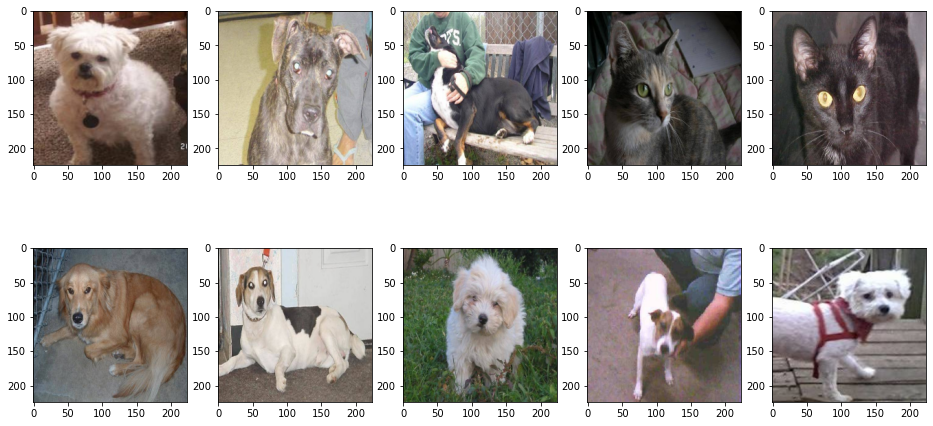

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(train_files[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
  #  subplot.set_title('%s' % path.split('/')[-1])
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    plt.imshow(img)

## Загружаем предобученную модель

In [17]:
# base_model - объект класса keras.models.Model (Functional Model)
vgg_model_path = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = vgg16.VGG16(weights=vgg_model_path,
                         include_top=False,
                         input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [18]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Добавляем полносвязный слой

In [19]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-5].output
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации  
                        #  activity_regularizer=tf.keras.regularizers.l2(1e-4),
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')


## Выводим архитектуру модели

In [20]:
model.summary()

Model: "dogs_vs_cats"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## Компилируем модель и запускаем обучение

In [21]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [22]:
val_samples = 5  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором

# запускаем процесс обучения
model.fit(train_data,
          steps_per_epoch=10,  # число вызовов генератора за эпоху
          epochs=100,  # число эпох обучения
          validation_data=validation_data)

Epoch 1/100
10/10 [==============================] - 2s 184ms/step - loss: 1573.8860 - accuracy: 0.4719 - val_loss: 0.1386 - val_accuracy: 1.0000
Epoch 2/100
10/10 [==============================] - 1s 147ms/step - loss: 1.2301 - accuracy: 0.4906 - val_loss: 0.6954 - val_accuracy: 0.2000
Epoch 3/100
10/10 [==============================] - 1s 141ms/step - loss: 0.6931 - accuracy: 0.5312 - val_loss: 0.6960 - val_accuracy: 0.2000
Epoch 4/100
10/10 [==============================] - 1s 137ms/step - loss: 0.6935 - accuracy: 0.4906 - val_loss: 0.6962 - val_accuracy: 0.2000
Epoch 5/100
10/10 [==============================] - 1s 139ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6964 - val_accuracy: 0.2000
Epoch 6/100
10/10 [==============================] - 1s 134ms/step - loss: 0.6933 - accuracy: 0.5094 - val_loss: 0.6965 - val_accuracy: 0.2000
Epoch 7/100
10/10 [==============================] - 1s 136ms/step - loss: 0.6934 - accuracy: 0.4969 - val_loss: 0.6966 - val_accuracy: 0.2

Epoch 58/100
10/10 [==============================] - 2s 155ms/step - loss: 0.6932 - accuracy: 0.5156 - val_loss: 0.6975 - val_accuracy: 0.2000
Epoch 59/100
10/10 [==============================] - 1s 134ms/step - loss: 0.6940 - accuracy: 0.4563 - val_loss: 0.6971 - val_accuracy: 0.2000
Epoch 60/100
10/10 [==============================] - 1s 138ms/step - loss: 0.6933 - accuracy: 0.5031 - val_loss: 0.6969 - val_accuracy: 0.2000
Epoch 61/100
10/10 [==============================] - 1s 138ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6969 - val_accuracy: 0.2000
Epoch 62/100
10/10 [==============================] - 1s 134ms/step - loss: 0.6935 - accuracy: 0.4844 - val_loss: 0.6966 - val_accuracy: 0.2000
Epoch 63/100
10/10 [==============================] - 2s 154ms/step - loss: 0.6933 - accuracy: 0.5063 - val_loss: 0.6964 - val_accuracy: 0.2000
Epoch 64/100
10/10 [==============================] - 1s 143ms/step - loss: 0.6931 - accuracy: 0.5281 - val_loss: 0.6968 - val_accuracy:

In [13]:
model.save('cats-dogs-vgg16.hdf5')

## Предсказания на проверочной выборке

In [23]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

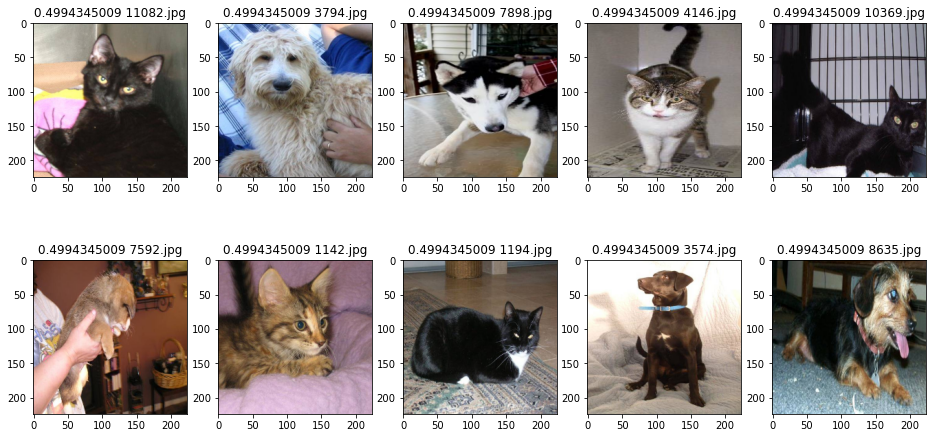

In [24]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.10f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [44]:
import re

with open('submit.csv', 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [ ]:
# LogLoss = 1.04979